# Project 2


## Civic Data Analysis
#### Exploratory Data Analysis (EDA)

---

##### Hypothetical Business Case

A mayor created a new data analysis team to provide policy advice. The mayor wants to start a new initiative to move the needle on two separate issues:
- high school education outcomes,
- drug abuse in the community.

##### Datasets
- SAT Scores by State
- Drug Use by Age in the community.

##### Objectives (Exploratory Data Analysis)
- Load and Inspect the Data
- Identify patterns
- Visualize data where relevant and informative
- Generate a Data Dictionary for the data
- Feature Engineering - generate features

##### Assumptions
1. SAT Dataset:
    - Assumed that Rate represents the number of total eligible seniors in a given state who actually took the SAT exam.

##### Findings & Recommendations
1. SAT Dataset:
    - There is bimodal distribution of the data across states.
    - More information should be gathered for state-specific scores and a history of scores to be able to recommend more county-specific suggestions to the mayor. 
    - The higher the Math Scores, the higher the Verbal Scores, and the higher the Total Score.
    - There is not significant variance of contribution of each subject's score to the Total Score in each state. For example, there is not a single state whereby 70% of the Total Score was attributed to the Math Score.
    - 

3. Recommendations:
    - See if there exists data for the age of test takers so there can be a common ground by which to compare the drug dataset and the SAT score dataset. This might allow for more thorough analysis on how certain age groups that use certain drugs or do not use certain drugs during teen years impact academic success. 
    

##### Citations
1. SAT dataset:
    - Seaborn heatmap (diagonal triangle) was from seaborn documentation.


#### Package imports

In [1]:
# Python Tools
import numpy as np
import scipy.stats as stats
import pandas as pd

# WorkFlow
from pprint import pprint
import csv

# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## SAT data set

### 1. Load the dataset

In [2]:
pwd

'/home/jovyan/DSI/DSI_Plus_1_Curriculum/project-two/ipynb'

In [3]:
sat_data = '../assets/sat_scores.csv'

### 1A. Load the dataset in as a nested list, convert it to a dictionary, and then convert the dictionary to pandas DataFrame

In [4]:
with open(sat_data) as sat_scores:
    reader = csv.reader(sat_scores)
    scores_list = []
    for row in reader:
        scores_list.append(row)
    pprint (scores_list[:5])

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]


In [5]:
len(scores_list)

53

The keys will be the header names, "State", "Rate", "Verbal", and "Math" with the values as each of the corresponding values

In [6]:
scores_dict = {}

# create the dictionary keys
for i in range(len(scores_list[0])):
    scores_dict[scores_list[0][i]] = []

In [7]:
# create the dictionary keys
i = 1
while i <= len(scores_list[1:]):
    scores_dict['State'].append(scores_list[i][0])
    scores_dict['Rate'].append(scores_list[i][1])
    scores_dict['Verbal'].append(scores_list[i][2])
    scores_dict['Math'].append(scores_list[i][3])
    i += 1

In [8]:
# convert the dictionary into a pandas DataFrame
scores_dict_df = pd.DataFrame(scores_dict, columns=['State', 'Rate', 'Verbal', 'Math'])
scores_dict_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


Confirm that all 52 states were captured in the pandas DataFrame

In [9]:
scores_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


Notice that all of the data types are represented as 'object' which means the numeric data is not stored as integer types. Therefore, all numeric types should be cleaned and converted to integers.

In [10]:
scores_dict_df['Rate'] = [float(rate) for rate in scores_dict_df['Rate']]
scores_dict_df['Verbal'] = [float(verbal) for verbal in scores_dict_df['Verbal']]
scores_dict_df['Math'] = [float(math) for math in scores_dict_df['Math']]

In [11]:
scores_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null float64
Verbal    52 non-null float64
Math      52 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


### 1B. Load the dataset directly into a pandas DataFrame

In [12]:
sat_scores_df = pd.read_csv('../assets/sat_scores.csv')
sat_scores_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516



## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes my data. 
This will contain the name of each variable (column), the type of the variable, my description of each variable, and the shape (rows and columns) of the entire dataset.

In [13]:
scores_list_obj = []
scores_dict_obj = {}

In [14]:
features = [col for col in sat_scores_df]
scores_list_obj.append(features)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math']]

In [15]:
Types = [type(sat_scores_df[col][0]) for col in sat_scores_df]
scores_list_obj.append(Types)
scores_list_obj

Types_dict ={}
Types_dict['Math'] = type(sat_scores_df['Math'][0])
Types_dict['Rate'] = type(sat_scores_df['Rate'][0])
Types_dict['State'] = type(sat_scores_df['State'][0])
Types_dict['Verbal'] = type(sat_scores_df['Verbal'][0])

Types_dict

{'Math': numpy.int64, 'Rate': numpy.int64, 'State': str, 'Verbal': numpy.int64}

In [16]:
feature_descr = ['where SAt was administered', 
               '% of total students taking SAT', 
               'score for Verbal section', 
               'score for Math section']
scores_list_obj.append(feature_descr)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math'],
 [str, numpy.int64, numpy.int64, numpy.int64],
 ['where SAt was administered',
  '% of total students taking SAT',
  'score for Verbal section',
  'score for Math section']]

In [17]:
descr_dict = {}

descr_dict['Math'] = scores_list_obj[2][3]
descr_dict['Verbal'] = scores_list_obj[2][2]
descr_dict['Rate'] = scores_list_obj[2][1]
descr_dict['State'] = scores_list_obj[2][0]

In [18]:
df_shape = sat_scores_df.shape

In [19]:
scores_dict_obj['Variables'] = features
scores_dict_obj['Types'] = Types_dict
scores_dict_obj['Shape'] = df_shape
scores_dict_obj['Descriptions'] = feature_descr

pprint (scores_dict_obj)

{'Descriptions': ['where SAt was administered',
                  '% of total students taking SAT',
                  'score for Verbal section',
                  'score for Math section'],
 'Shape': (52, 4),
 'Types': {'Math': <class 'numpy.int64'>,
           'Rate': <class 'numpy.int64'>,
           'State': <class 'str'>,
           'Verbal': <class 'numpy.int64'>},
 'Variables': ['State', 'Rate', 'Verbal', 'Math']}


## 3. Inspect the dataset

*Assumption:* The SAT scores are out of a total 1600 points, 800 for Math and 800 for Verbal. The Rate information is unclear. After some online research, the only assumption I was able to draw is it is the rate that measures the percentage of students in each state that sat for the exam.

### 3A. Inspect the SAT Rates

In [20]:
sat_scores_df['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

Observations:
- The standard deviation is nearly the same size as the mean (27 vs. 37) compared to a total count of 52 data points and a scale of 0-100. This suggests that the Rate is not normally distributed and is possibly skewed.
- The max of 82 lies about 72% of 1 standard deviation away from the 75% percentile of 63. This suggests that there may possibly be outliers in the dataset.
- If the data is in fact skewed, the mode might be a better measure than the mean.

In [21]:
stats.mode(sat_scores_df['Rate'])

ModeResult(mode=array([4]), count=array([3]))

3 out of 52 occurences, the Rate = 4. 
We have a limited dataset here.
Stretch goals include subsequently getting additional data to compare or better infer how 'Rate' data should be interpreted/understood.

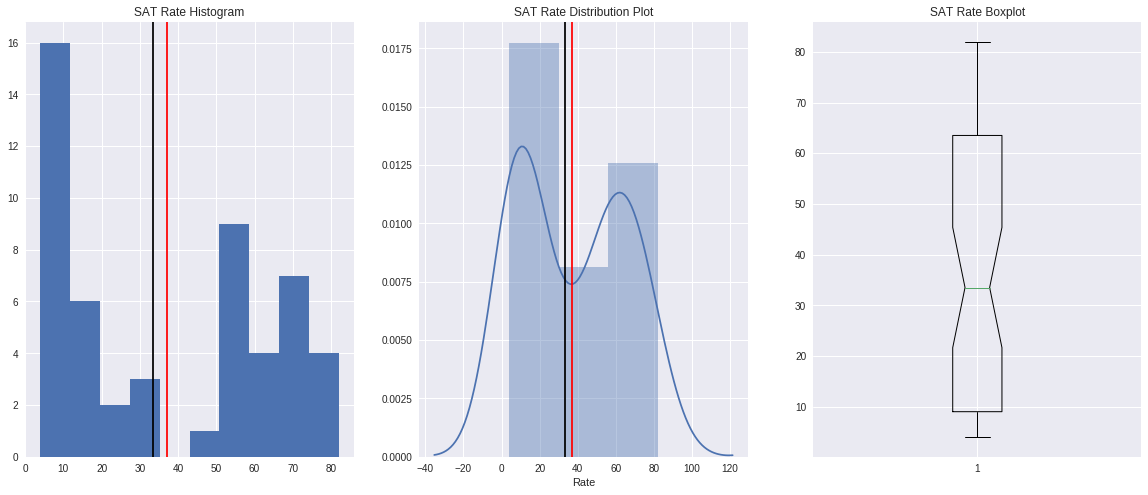

In [22]:
plt.figure(1, figsize=(20, 8))

plt.subplot(131)
_ = sat_scores_df['Rate'].hist()
plt.axvline(sat_scores_df['Rate'].mean(), c='red')
plt.axvline(sat_scores_df['Rate'].median(), c='black')
plt.title('SAT Rate Histogram')

plt.subplot(132)
_ = sns.distplot(sat_scores_df['Rate'])
plt.axvline(sat_scores_df['Rate'].mean(), c='red')
plt.axvline(sat_scores_df['Rate'].median(), c='black')
plt.title('SAT Rate Distribution Plot')

plt.subplot(133)
_ = plt.boxplot(sat_scores_df['Rate'], notch=True, vert=True, showfliers=True)
#_ = sns.boxplot(sat_scores_df['Rate'])
plt.title('SAT Rate Boxplot')

plt.show()

The histogram and distribution plot above suggests that there is bimodal distribution. Additionally the boxplot suggests that most of the Rate data points fall between in an approximate range of ~8 or 9 to ~62 or 63. 

### 3B. Inspect the SAT Scores

Complete the same analysis for each the verbal scores and the math scores.

In [23]:
!pip install display --quiet

In [24]:
display(sat_scores_df['Math'].describe())
display(sat_scores_df['Verbal'].describe())

count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [25]:
display(stats.mode(sat_scores_df['Math']))
display(stats.mode(sat_scores_df['Verbal']))

ModeResult(mode=array([499]), count=array([6]))

ModeResult(mode=array([562]), count=array([3]))

Visualize the Math data and the Verbal data

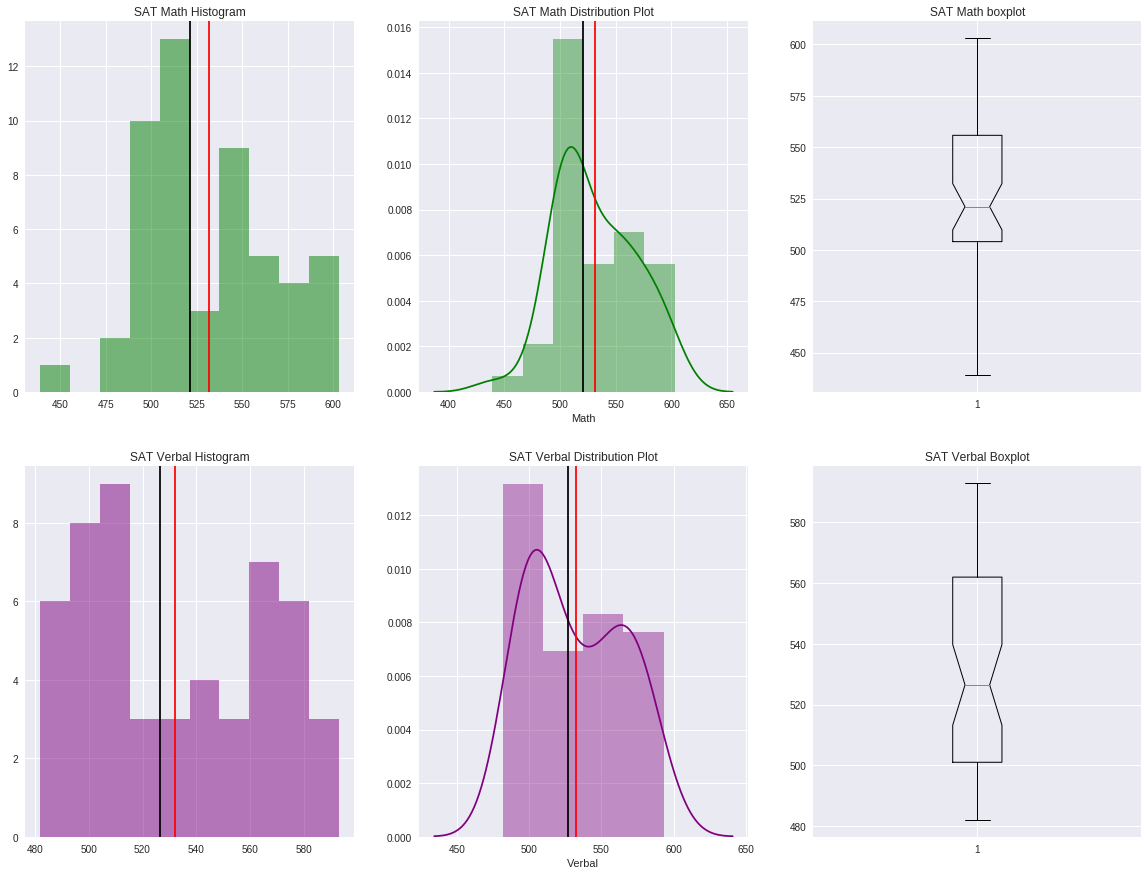

In [26]:
plt.figure(1, figsize=(20, 15))

plt.subplot(231)
_ = sat_scores_df['Math'].hist(color='green', alpha=0.5)
plt.axvline(sat_scores_df['Math'].mean(), color='red')
plt.axvline(sat_scores_df['Math'].median(), color='black')
plt.title('SAT Math Histogram')

plt.subplot(232)
_ = sns.distplot(sat_scores_df['Math'], color='green')
plt.axvline(sat_scores_df['Math'].mean(), color='red')
plt.axvline(sat_scores_df['Math'].median(), color='black')
plt.title('SAT Math Distribution Plot')

plt.subplot(233)
_ = plt.boxplot(sat_scores_df['Math'], notch=True, vert=True, showfliers=True)
plt.title('SAT Math boxplot')

plt.subplot(234)
_ = sat_scores_df['Verbal'].hist(color='purple', alpha = 0.5)
plt.axvline(sat_scores_df['Verbal'].mean(), color='red')
plt.axvline(sat_scores_df['Verbal'].median(), color='black')
plt.title('SAT Verbal Histogram')

plt.subplot(235)
_ = sns.distplot(sat_scores_df['Verbal'], color='purple')
plt.axvline(sat_scores_df['Verbal'].mean(), color='red')
plt.axvline(sat_scores_df['Verbal'].median(), color='black')
plt.title('SAT Verbal Distribution Plot')

plt.subplot(236)
_ = plt.boxplot(sat_scores_df['Verbal'], notch=True, vert=True, showfliers=True)
plt.title('SAT Verbal Boxplot')


plt.show()

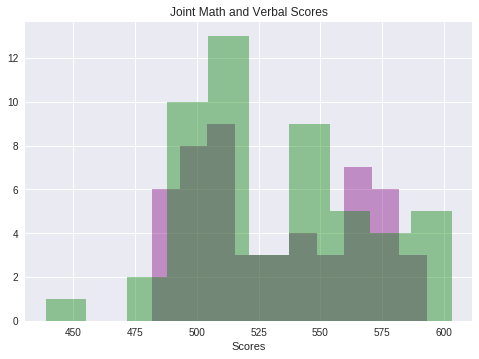

In [27]:
_ = sns.distplot(sat_scores_df['Verbal'], color = 'purple', kde=False, bins=10)
_ = sns.distplot(sat_scores_df['Math'], color = 'green', kde=False, bins = 10)
plt.title('Joint Math and Verbal Scores')
plt.xlabel('Scores')
plt.show()

The above joint distribution illustrates scores (measured by frequency on the y-axis) for both the Verbal (purple) and Math (green).

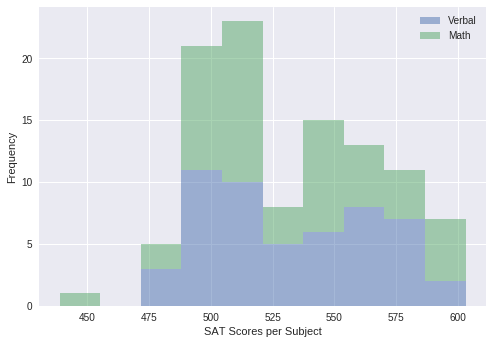

In [28]:
verbal_math_df = sat_scores_df[['Verbal', 'Math']]
_ = verbal_math_df.plot.hist(stacked=True, alpha=0.5, bins=10)
plt.xlabel('SAT Scores per Subject')
plt.show()

### 3C. Inspect all Numeric Data

There is no total score shown, so I will generate a new feature that sums the Verbal and Math scores so a Total score is information we can have for each of the states.

In [29]:
sat_scores_df['Total'] = sat_scores_df['Verbal']+sat_scores_df['Math']
sat_scores_df.head()

,State,Rate,Verbal,Math,Total
0,CT,82,509,510,1019
1,NJ,81,499,513,1012
2,MA,79,511,515,1026
3,NY,77,495,505,1000
4,NH,72,520,516,1036


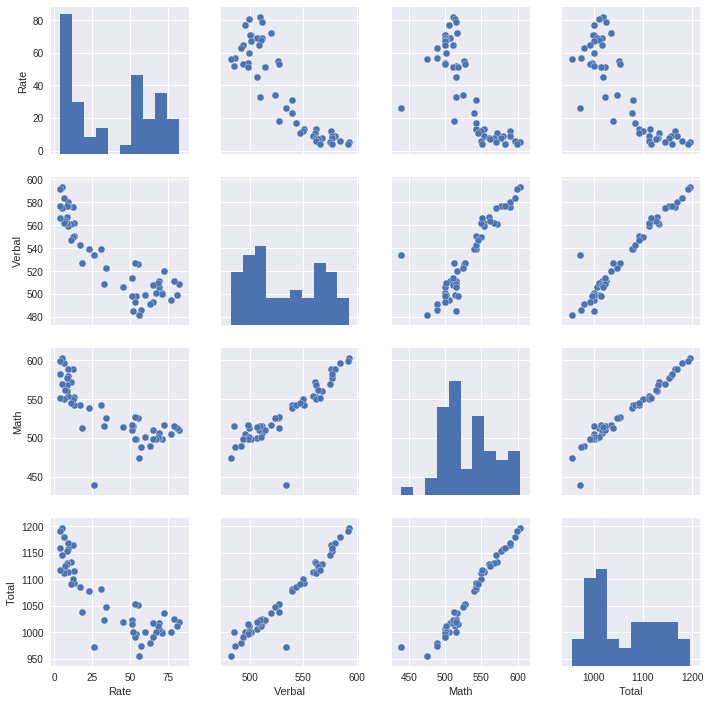

In [30]:
_ = sns.pairplot(sat_scores_df)

**Observations:**
- Math and Verbal scores increase proportionately. As Math scores increase, so do Verbal scores. The converse is also true. This indicates that most students taking the exam tend to do well in both subjects and there is not an inverse relationship between the two subjects.
- As the Rate increases, Math scores tend to be lower to the 500-560 range. This shows the average Math scores decreasing as the percentage of SAT exams taken increase.
- As the Rate increases, verbal scores thend to be lower in the 400-520 range. This shows the average Verbal scores decreasing as the percentage of SAT exams taken increase. The same observation is true of Total scores.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


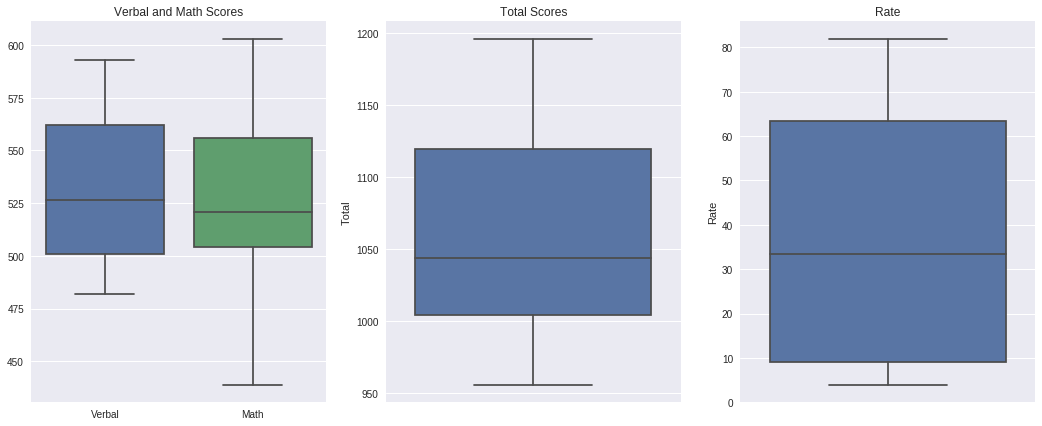

In [31]:
plt.figure(1, figsize=(18, 7))

plt.subplot(131)
_ = sns.boxplot(sat_scores_df[['Verbal', 'Math']])
plt.title('Verbal and Math Scores')

plt.subplot(132)
_ = sns.boxplot(sat_scores_df['Total'], orient='v')
plt.title('Total Scores')

plt.subplot(133)
_ = sns.boxplot(sat_scores_df['Rate'], orient='v')
plt.title('Rate')

plt.show()

*Boxplot Benefits*
- The benefit of using a boxplot is it can provide some information about skewness of the data (by looking at the symmetry of the boxplot).
- The boxplot will also reveal any outliers to the extent any exist.
- The boxplot reveals quartiles as well, marked by the ends of the box.
- The median is marked by the line in the box.

*Boxplot vs. Histogram*
- A histogram does not reveal outliers, median values, or quartiles well.

*Boxplots vs. Scatter Plots*
- While scatter plots do sometimes reveal outliers, it does not show quartiles, nor does it reveal median values. Further, it does not tell anything about skewness of the data.

*Issue w/ putting Rate and Total Score on the same boxplot as Math & Verbal*
- Rate is not measured the same way Verbal and Math are. Each Verbal and Math scores are out of 800 total, therefore they would have the same y-axis. However, since rate is a percentile, (0-100) it would not make sense to have Rate share the same boxplot as the test scores. THe same applies oto the Total Score.

## 4. Interpreting the Data

In [32]:
verbal_abv_avg = sat_scores_df[sat_scores_df['Verbal'] > sat_scores_df['Verbal'].mean()][['State', 'Verbal']]
display(verbal_abv_avg.shape)
verbal_abv_avg.sort_values(by = 'Verbal', ascending=False)

(24, 2)

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577
38,KS,577
42,MO,577
33,IL,576
46,UT,575
41,OK,567


In [33]:
math_abv_avg = sat_scores_df[sat_scores_df['Math'] > sat_scores_df['Math'].mean()][['State', 'Math']]
display(math_abv_avg.shape)
math_abv_avg.sort_values(by='Math', ascending=False)

(23, 2)

,State,Math
47,IA,603
49,ND,599
44,WI,596
33,IL,589
37,MN,589
48,SD,582
38,KS,580
42,MO,577
36,MI,572
46,UT,570


In [34]:
total_abv_avg = sat_scores_df[sat_scores_df['Total'] > sat_scores_df['Total'].mean()][['State', 'Total']]
display(total_abv_avg.shape)
total_abv_avg.sort_values(by='Total', ascending=False)

(23, 2)

,State,Total
47,IA,1196
49,ND,1191
44,WI,1180
37,MN,1169
33,IL,1165
48,SD,1159
38,KS,1157
42,MO,1154
46,UT,1145
36,MI,1133


If the data were to be put into a model, it would need to be scaled (`sklearn.preprocessing.StandardScaler`) and normalized by the standard deviation for each of the data points (Verbal, Math, and Total). Furthermore, scaling would be good for purposes of doing additional analysis.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
standscal = StandardScaler()

In [37]:
sat_scores_sc = standscal.fit_transform(sat_scores_df[['Verbal', 'Math', 'Total', 'Rate']])

In [38]:
sat_scores_sc_df = pd.DataFrame(sat_scores_sc, columns=['Verbal', 'Math', 'Total', 'Rate'])
sat_scores_sc_df.head()

,Verbal,Math,Total,Rate
0,-0.699352,-0.602798,-0.665996,1.658635
1,-1.003164,-0.518687,-0.770714,1.621650
2,-0.638589,-0.462613,-0.561278,1.547680
3,-1.124689,-0.742984,-0.950231,1.473710
4,-0.365159,-0.434575,-0.411680,1.288785


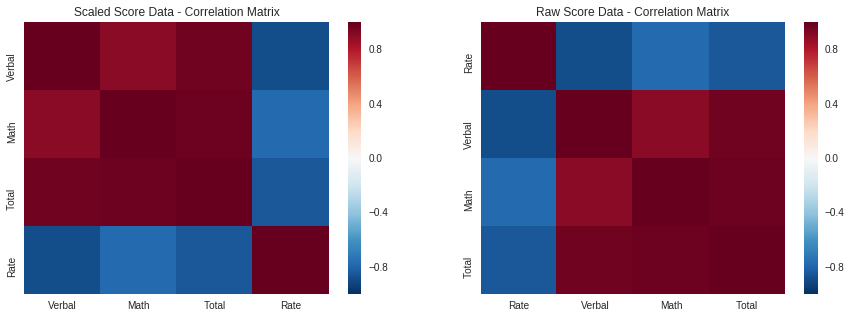

In [39]:
plt.figure(1, figsize=(15,5))

plt.subplot(121)
_ = sns.heatmap(sat_scores_sc_df.corr())
plt.title('Scaled Score Data - Correlation Matrix')

plt.subplot(122)
_ = sns.heatmap(sat_scores_df.corr())
plt.title('Raw Score Data - Correlation Matrix')

plt.show()

Observations: The relationships between each of the numeric value columns of data are not changed significantly in the correlation matrices as shown above. However, the scaled data is the data that would be used in a predictive model using regression (so as not to allow the model to place greater value on a score vs. the rate because the rate ranges between 0 and 100). These correltaion matrices as represented by heatmaps reveal very similar information to us as the pairplots generated above.

## 5. Feature Engineering - Generating new features

While I'm not building a predictive model in this instance, some feature engineering was completed to see if more information could be extrapolated from the existing data available.
* Score differences between Math and Verbal
* Looking at the contribution to total score from each subject (Math vs. Total) and (Verbal vs. Total)
* Show the state ranking for highest verbal and highest math scores.

In [40]:
sat_scores_df['Math > Verbal'] = sat_scores_df['Math'] - sat_scores_df['Verbal']
sat_scores_df['Verbal > Math'] = sat_scores_df['Verbal'] - sat_scores_df['Math']

In [41]:
sat_scores_df['Math vs Total'] = sat_scores_df['Math'] / sat_scores_df['Total']
sat_scores_df['Verbal vs Total'] = sat_scores_df['Verbal'] / sat_scores_df['Total']

In [50]:
math_sat_scores = sat_scores_df.sort_values(by='Math', ascending=False)

math_rank = []
i = 1
while i <= len(math_sat_scores):
    math_rank.append(i)
    i += 1

sat_scores_df.sort_values(by='Math', ascending=False, inplace=True)
sat_scores_df['Math Ranking'] = math_rank

In [51]:
verbal_sat_scores = sat_scores_df.sort_values(by='Verbal', ascending=False)

verbal_rank = []
i = 1
while i <= len(verbal_sat_scores):
    verbal_rank.append(i)
    i += 1

sat_scores_df.sort_values(by='Verbal', ascending=False, inplace=True)
sat_scores_df['Verbal Ranking'] = verbal_rank

In [52]:
sat_scores_df

,State,Rate,Verbal,Math,Total,Math > Verbal,Verbal > Math,Math vs Total,Verbal vs Total,Math Ranking,Verbal Ranking
47,IA,5,593,603,1196,10,-10,0.504181,0.495819,1,1
49,ND,4,592,599,1191,7,-7,0.502939,0.497061,2,2
44,WI,6,584,596,1180,12,-12,0.505085,0.494915,3,3
37,MN,9,580,589,1169,9,-9,0.503849,0.496151,4,4
48,SD,4,577,582,1159,5,-5,0.502157,0.497843,6,5
38,KS,9,577,580,1157,3,-3,0.501296,0.498704,7,6
42,MO,8,577,577,1154,0,0,0.500000,0.500000,8,7
33,IL,12,576,589,1165,13,-13,0.505579,0.494421,5,8
46,UT,5,575,570,1145,-5,5,0.497817,0.502183,10,9
41,OK,8,567,561,1128,-6,6,0.497340,0.502660,13,10


#### **Some observations**
- It is is interesting to note that the VM rankings (where the rank is 1 for the largest Verb-Math difference) are negatively correlatated to Verb-Math values. But this also makes sense since the values of the VM Rank is a lower value for a larger difference.
- There is a strong correlation between Math Scores and Verbal Scores. 
- Regenerate the Correlation Matrix illustrated in the form of a heatmap to re-examine and potential relationships that might be closely related between the original features and the generated features.
- Regenerate a pairplot to examine the reationships between the features.

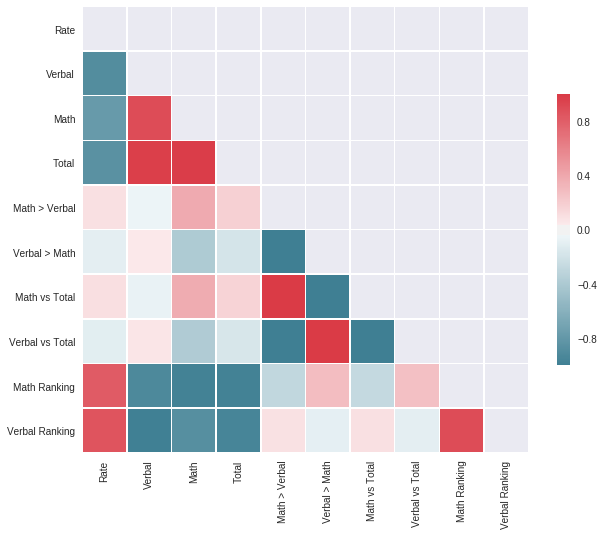

In [55]:
# compute the correlation matrix
corr_matrix = sat_scores_df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# setup the figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

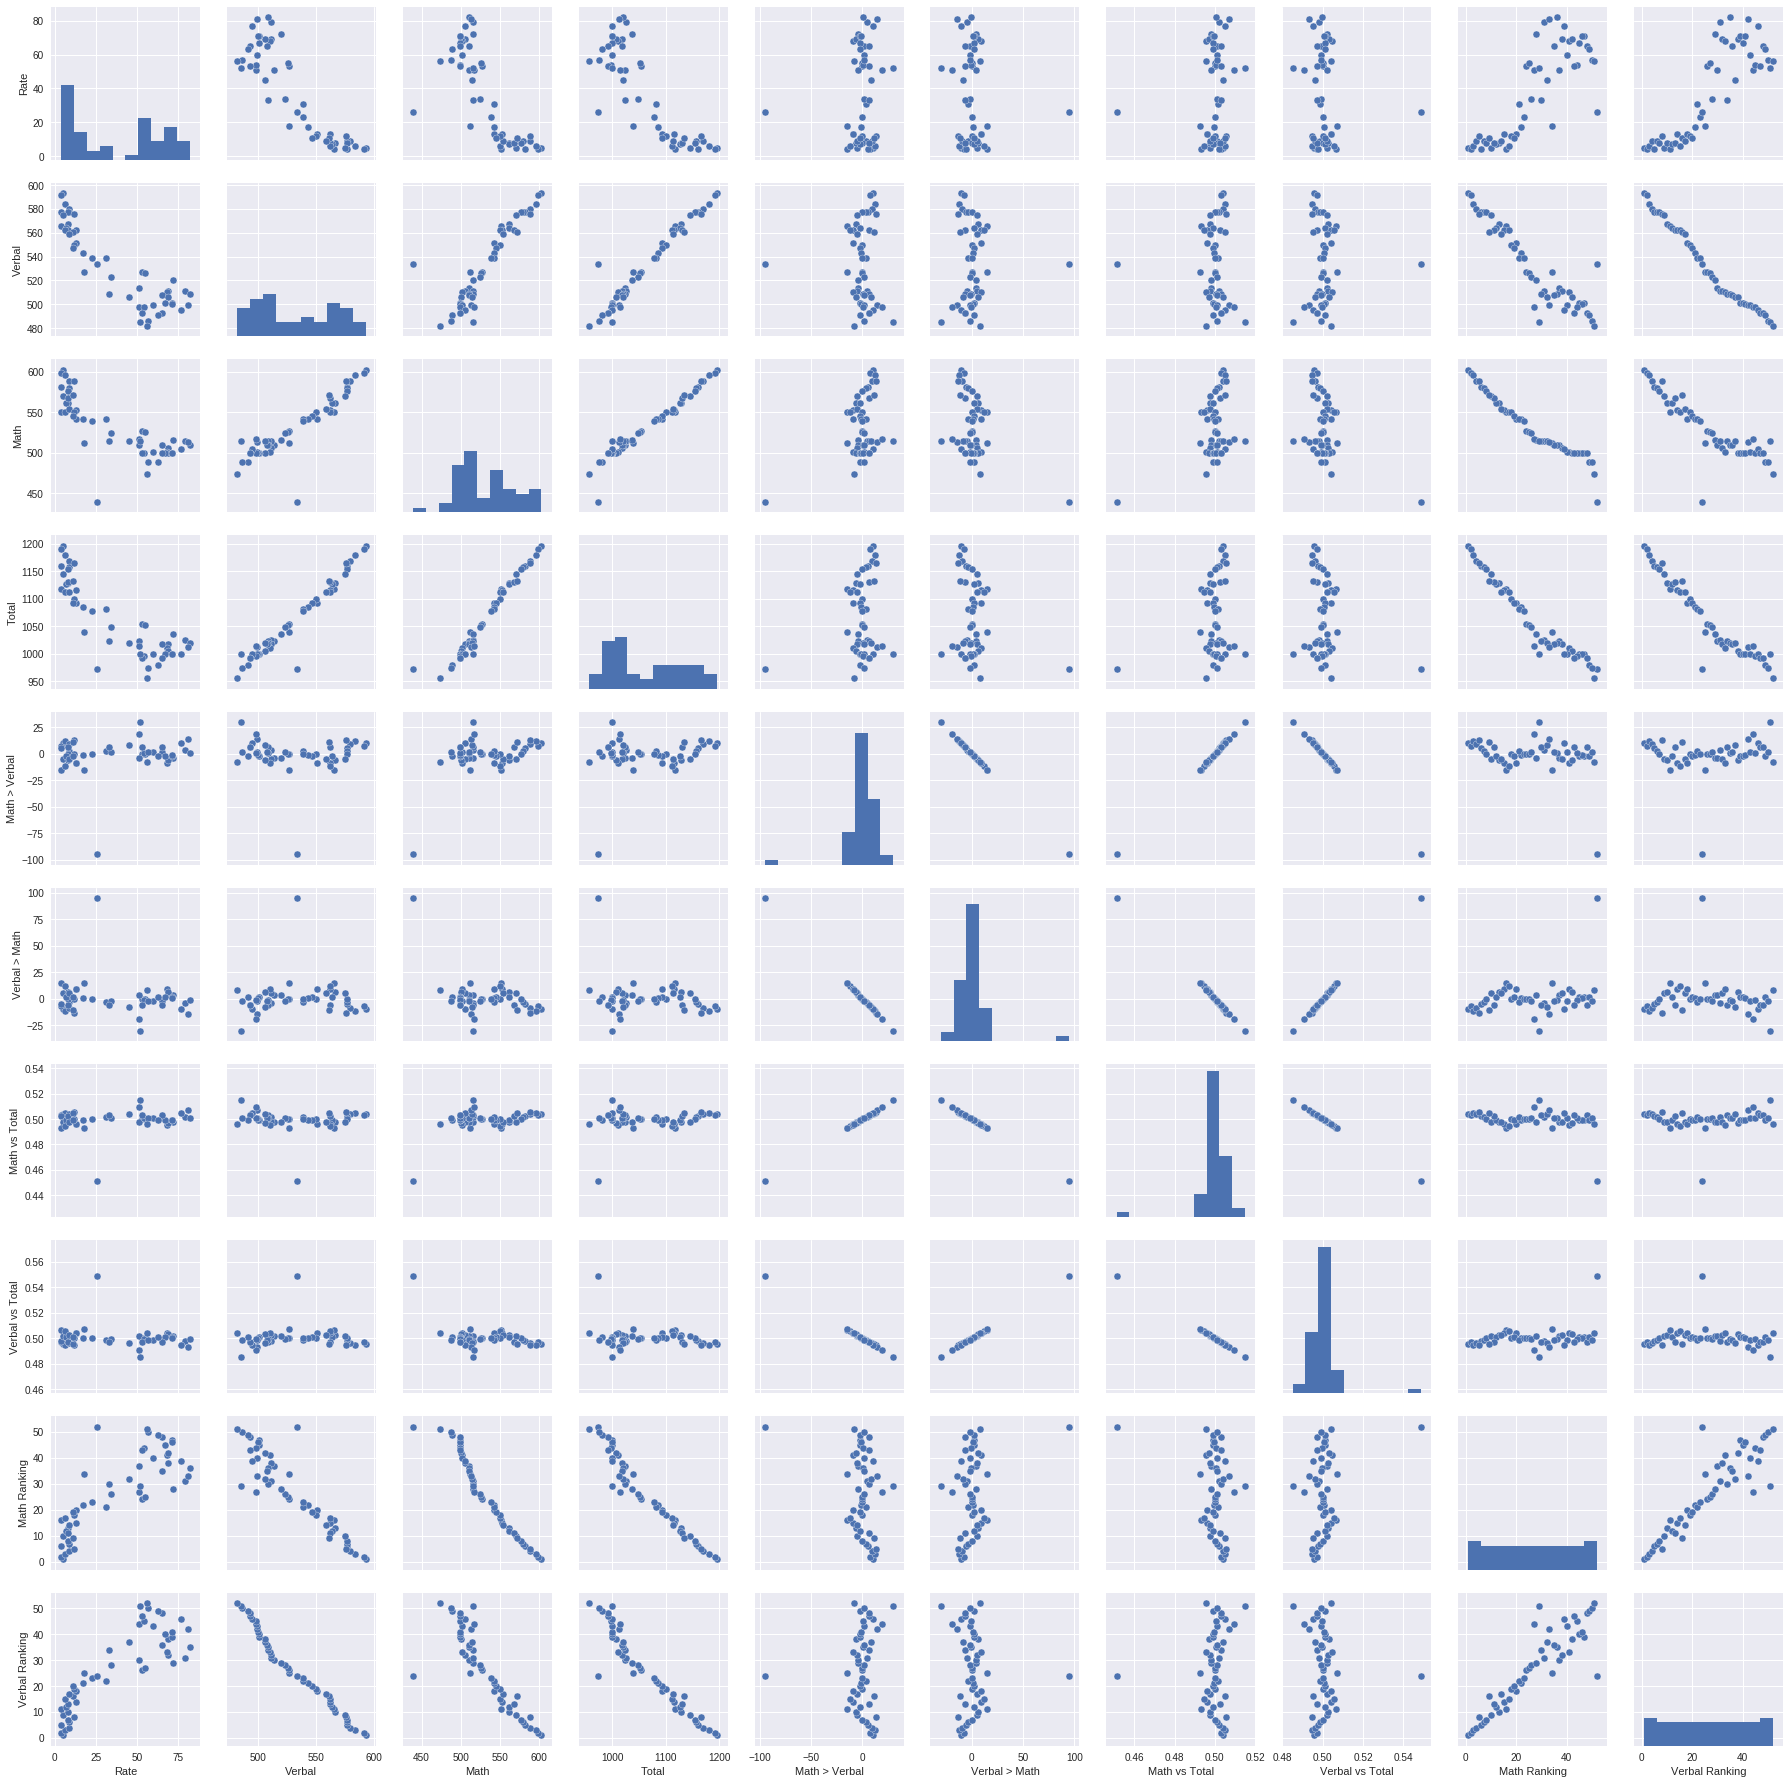

In [56]:
_ = sns.pairplot(sat_scores_df)

In [58]:
# display the covariance matrix
display(sat_scores_df.cov())

# display the correlation matrix
display(sat_scores_df.corr())

,Rate,Verbal,Math,Total,Math > Verbal,Verbal > Math,Math vs Total,Verbal vs Total,Math Ranking,Verbal Ranking
Rate,745.387632,-804.355958,-760.803922,-1565.159879,43.552036,-43.552036,0.023057,-0.023057,337.058824,352.941176
Verbal,-804.355958,1104.646682,1077.147059,2181.793741,-27.499623,27.499623,-0.016527,0.016527,-463.088235,-497.872549
Math,-760.803922,1077.147059,1297.078431,2374.225490,219.931373,-219.931373,0.107773,-0.107773,-530.137255,-476.627451
Total,-1565.159879,2181.793741,2374.225490,4556.019231,192.431750,-192.431750,0.091246,-0.091246,-993.225490,-974.500000
Math > Verbal,43.552036,-27.499623,219.931373,192.431750,247.430995,-247.430995,0.124300,-0.124300,-67.049020,21.245098
Verbal > Math,-43.552036,27.499623,-219.931373,-192.431750,-247.430995,247.430995,-0.124300,0.124300,67.049020,-21.245098
Math vs Total,0.023057,-0.016527,0.107773,0.091246,0.124300,-0.124300,0.000063,-0.000063,-0.032602,0.011839
Verbal vs Total,-0.023057,0.016527,-0.107773,-0.091246,-0.124300,0.124300,-0.000063,0.000063,0.032602,-0.011839
Math Ranking,337.058824,-463.088235,-530.137255,-993.225490,-67.049020,67.049020,-0.032602,0.032602,229.666667,207.588235
Verbal Ranking,352.941176,-497.872549,-476.627451,-974.500000,21.245098,-21.245098,0.011839,-0.011839,207.588235,229.666667


,Rate,Verbal,Math,Total,Math > Verbal,Verbal > Math,Math vs Total,Verbal vs Total,Math Ranking,Verbal Ranking
Rate,1.000000,-0.886432,-0.773746,-0.849327,0.101412,-0.101412,0.106755,-0.106755,0.814640,0.853026
Verbal,-0.886432,1.000000,0.899871,0.972544,-0.052600,0.052600,-0.062858,0.062858,-0.919397,-0.988456
Math,-0.773746,0.899871,1.000000,0.976666,0.388219,-0.388219,0.378271,-0.378271,-0.971306,-0.873267
Total,-0.849327,0.972544,0.976666,1.000000,0.181241,-0.181241,0.170882,-0.170882,-0.970971,-0.952665
Math > Verbal,0.101412,-0.052600,0.388219,0.181241,1.000000,-1.000000,0.998896,-0.998896,-0.281265,0.089122
Verbal > Math,-0.101412,0.052600,-0.388219,-0.181241,-1.000000,1.000000,-0.998896,0.998896,0.281265,-0.089122
Math vs Total,0.106755,-0.062858,0.378271,0.170882,0.998896,-0.998896,1.000000,-1.000000,-0.271940,0.098747
Verbal vs Total,-0.106755,0.062858,-0.378271,-0.170882,-0.998896,0.998896,-1.000000,1.000000,0.271940,-0.098747
Math Ranking,0.814640,-0.919397,-0.971306,-0.970971,-0.281265,0.281265,-0.271940,0.271940,1.000000,0.903867
Verbal Ranking,0.853026,-0.988456,-0.873267,-0.952665,0.089122,-0.089122,0.098747,-0.098747,0.903867,1.000000



1) How the covariance matrix is different from the correlation matrix:
- The covariance measures how much the y values vary given the x values
- The correlation measures is standardized based on each x and y's standard deviation; therefore the correlation is bound by -1 and 1 whereas the covariance can whipsaw across all numbers. 


2) The process to convert the covariance into correlation:
- the correlation is the covariance of x and y **divided by** the quantity of the standard deviation of x multiplied by the standard deviation of y. Correlation is standardizing the data points by the product of the standard deviation of each x and y. I did not visualize (heatmap) the covariance because covariance values are not bound by -1 and 1. The covariances could carry large negative or large positive values. Therefore visualizing it on a heatmap would not be value-add. 


3) Why the correlation matrix preferred to the covariance matrix for examining relationships in data:
- The correlation is preferred because it is a standardized measurement bound by -1 and 1. If x and y are vastly different data series, then it makes the covariance sometimes difficult to interpret. Correlation of -1 indicates a perfectly negative relationship between x and y, and 0 indicates no relationship exists between x and y. Lastly, a correlation of 1 indicates a perfectly positive relationship between x and y. 

In [57]:
# Examine summary statistics of all the features together
sat_scores_df.describe()

,Rate,Verbal,Math,Total,Math > Verbal,Verbal > Math,Math vs Total,Verbal vs Total,Math Ranking,Verbal Ranking
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,1063.519231,-0.519231,0.519231,0.499672,0.500328,26.500000,26.500000
std,27.301788,33.236225,36.014975,67.498291,15.729939,15.729939,0.007911,0.007911,15.154757,15.154757
min,4.000000,482.000000,439.000000,956.000000,-95.000000,-30.000000,0.451182,0.485000,1.000000,1.000000
25%,9.000000,501.000000,504.000000,1004.500000,-4.250000,-6.000000,0.497989,0.497068,13.750000,13.750000
50%,33.500000,526.500000,521.000000,1043.500000,0.000000,0.000000,0.500000,0.500000,26.500000,26.500000
75%,63.500000,562.000000,555.750000,1119.250000,6.000000,4.250000,0.502932,0.502011,39.250000,39.250000
max,82.000000,593.000000,603.000000,1196.000000,30.000000,95.000000,0.515000,0.548818,52.000000,52.000000



# Drug Use by Age


## 1. Load the Dataset
---

#### DataSet:
"drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

In [61]:
pwd

'/home/jovyan/DSI/DSI_Plus_1_Curriculum/project-two/ipynb'

In [63]:
drug_use = '../assets/drug-use-by-age.csv'
drugs_df = pd.read_csv(drug_use)
drugs_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


## 2. Inspect the Dataset

In [64]:
display(drugs_df.shape)
display(drugs_df.info())
display(drugs_df.describe())

(17, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

None

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


#### Initial Observations:
- Some of the numeric data is of an 'Object' type, which means it is a string. Those values must be cleaned and stored as numeric data types (integer or float).
- Some of the data points are also blank and have no information and only have a '-' mark.

**OBSERVATIONS from .describe()** 
- The data is inbalanced. The number of observations for each age group is not equal. Furthermore, if this data were modeled, it would return biased outcomes. The training set to start would be off-base (a GIGO scenario) due to inbalanced data. Furthermore, there's likely some skew in the drug categories since the values in the drug frequencies reflect median number of times a certain drug was used in the last 12 months for the sample size in a given age group. 

## 3. Clean the Drug Dataset to remove special characters and decide how to treat null values

In [66]:
clean_drugs_df = drugs_df.iloc[:, 1:].apply(pd.to_numeric, errors = 'coerce')
# to replace the '-' with Nan 
clean_drugs_df

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [68]:
clean_drugs_df['age'] = drugs_df['age']
# notably, I'm not converting the age to a float or int type because I want to keep the integrity of the age ranges
# reattach the age column to the dataframe clean drugs df

In [69]:
clean_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        16 non-null float64
tranqu

There still existing null values in the data. Examine the features that have null values to understand how that data might be distributed, skewed, eye-ball the mean and the median and determine the best way to replace the null values in the DataFrame instead of just immediately dropping. 

In [119]:
display(clean_drugs_df['cocaine-frequency'])
display(clean_drugs_df[['cocaine-frequency']].describe())
display(clean_drugs_df['cocaine-frequency'].median())
display(stats.mode(clean_drugs_df['cocaine-frequency']))

0      5.00
1      1.00
2      5.50
3      4.00
4      7.00
5      5.00
6      5.00
7      5.50
8      8.00
9      5.00
10     5.00
11     6.00
12     5.00
13     8.00
14    15.00
15    36.00
16     5.25
Name: cocaine-frequency, dtype: float64

,cocaine-frequency
count,17.000000
mean,7.720588
std,7.809190
min,1.000000
25%,5.000000
50%,5.250000
75%,7.000000
max,36.000000


5.25

ModeResult(mode=array([ 5.]), count=array([6]))

In [126]:
# Based on the above, I opted to substitute the Nan value with the median of 5.25 since it is closer to the mode of 5.
# The cocaine-frequency data appears skewed since the average is 7.875 and the median is 5.25 and the is 5 
# mode < median < mean

clean_drugs_df['cocaine-frequency'].fillna(5.25, axis=0, inplace=True)

In [120]:
display(clean_drugs_df['crack-frequency'])
display(clean_drugs_df[['crack-frequency']].describe())
display(clean_drugs_df['crack-frequency'].median())
display(stats.mode(clean_drugs_df['crack-frequency']))

0      NaN
1      3.0
2      NaN
3      9.5
4      1.0
5     21.0
6     10.0
7      2.0
8      5.0
9     17.0
10     5.0
11     6.0
12     6.0
13    15.0
14    48.0
15    62.0
16     NaN
Name: crack-frequency, dtype: float64

,crack-frequency
count,14.000000
mean,15.035714
std,18.111263
min,1.000000
25%,5.000000
50%,7.750000
75%,16.500000
max,62.000000


7.75

ModeResult(mode=array([ 5.]), count=array([2]))

In [127]:
# mode (5) < median (7.75) < mean (15.03)
# this data also appears to be skewed. 
# substitute the 3 Nan values with the median of 7.75, the mode only appears twice out of the 14 entries (14%)

clean_drugs_df['crack-frequency'].fillna(7.75, axis=0, inplace=True)

In [123]:
display(clean_drugs_df['heroin-frequency'])
display(clean_drugs_df[['heroin-frequency']].describe())
display(clean_drugs_df['heroin-frequency'].median())
display(stats.mode(clean_drugs_df['heroin-frequency']))

0      35.5
1       NaN
2       2.0
3       1.0
4      66.5
5      64.0
6      46.0
7     180.0
8      45.0
9      30.0
10     57.5
11     88.0
12     50.0
13     66.0
14    280.0
15     41.0
16    120.0
Name: heroin-frequency, dtype: float64

,heroin-frequency
count,16.000000
mean,73.281250
std,70.090173
min,1.000000
25%,39.625000
50%,53.750000
75%,71.875000
max,280.000000


53.75

ModeResult(mode=array([ 1.]), count=array([1]))

In [128]:
# Since the mode only appears once in the dataset, I will not substitute with that.
# Mode (1) < Median (53.75) < Mean (73.28)
# Substitute with the Median in this case.

clean_drugs_df['heroin-frequency'].fillna(53.75, axis=0, inplace=True)

In [130]:
# Mode (4) = Median (4) < Mean (6.15)
# since the mode appears 5 times, and is also equal to the median, substitute with 4.0

clean_drugs_df['inhalant-frequency'].fillna(4.0, axis=0, inplace=True)

In [131]:
display(clean_drugs_df['oxycontin-frequency'])
display(clean_drugs_df[['oxycontin-frequency']].describe())
display(clean_drugs_df['oxycontin-frequency'].median())
display(stats.mode(clean_drugs_df['oxycontin-frequency']))

0     24.5
1     41.0
2      4.5
3      3.0
4      4.0
5      6.0
6      7.0
7      7.5
8     12.0
9     13.5
10    17.5
11    20.0
12    13.5
13    46.0
14    12.0
15     5.0
16     NaN
Name: oxycontin-frequency, dtype: float64

,oxycontin-frequency
count,16.000000
mean,14.812500
std,12.798275
min,3.000000
25%,5.750000
50%,12.000000
75%,18.125000
max,46.000000


12.0

ModeResult(mode=array([ 12.]), count=array([2]))

In [132]:
# Mode (12) = Median (12) < Mean (14.8)
# For the same rationale stated above, substitute with 12.0

clean_drugs_df['oxycontin-frequency'].fillna(12.0, axis=0, inplace=True)

In [ ]:
display(clean_drugs_df['inhalant-frequency'])
display(clean_drugs_df[['inhalant-frequency']].describe())
display(clean_drugs_df['inhalant-frequency'].median())
display(stats.mode(clean_drugs_df['inhalant-frequency']))

In [133]:
display(clean_drugs_df['meth-frequency'])
display(clean_drugs_df[['meth-frequency']].describe())
display(clean_drugs_df['meth-frequency'].median())
display(stats.mode(clean_drugs_df['meth-frequency']))

0       NaN
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16      NaN
Name: meth-frequency, dtype: float64

,meth-frequency
count,15.000000
mean,35.966667
std,31.974581
min,2.000000
25%,12.000000
50%,30.000000
75%,47.000000
max,105.000000


30.0

ModeResult(mode=array([ 12.]), count=array([2]))

In [134]:
# Mode (12) < Median (30) < Mean (35.9)
# substitute with the Median value of 30

clean_drugs_df['meth-frequency'].fillna(30.0, axis=0, inplace=True)

Inspect the information output to ensure that there are no Nan values remaining

In [135]:
clean_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        17 non-null float64
tranqu

### Visualize the cleaned data

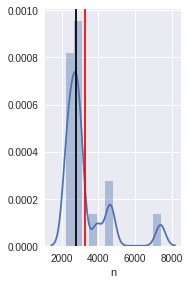

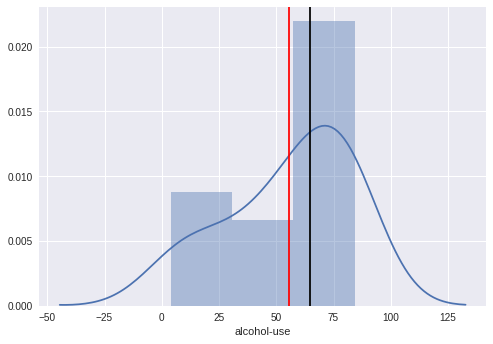

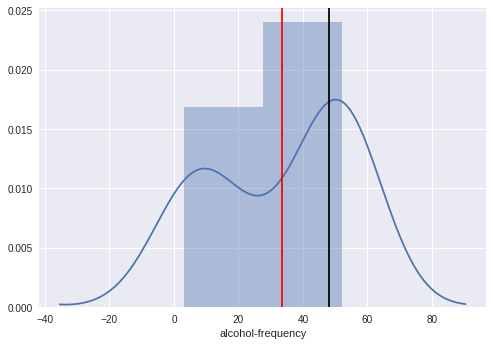

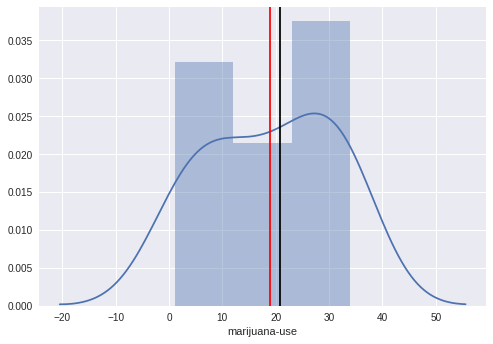

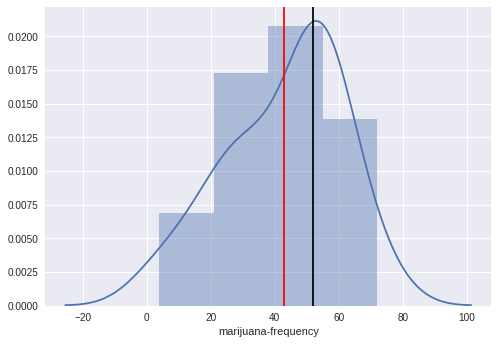

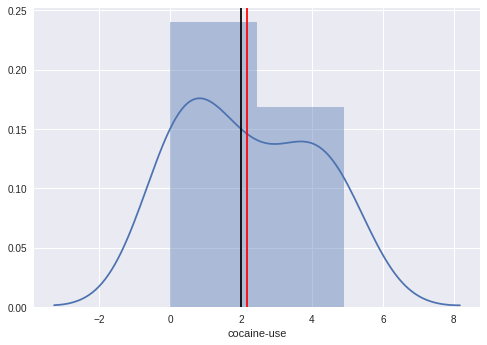

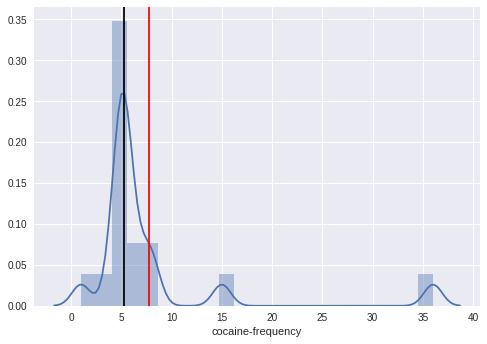

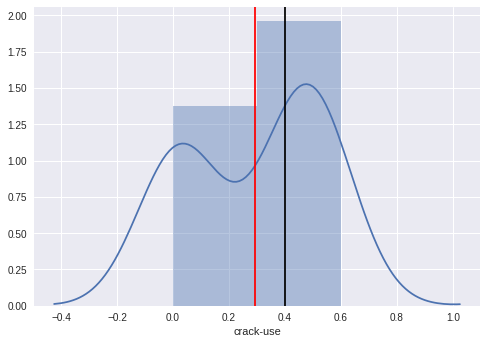

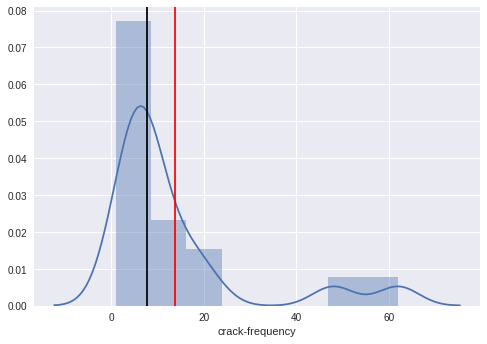

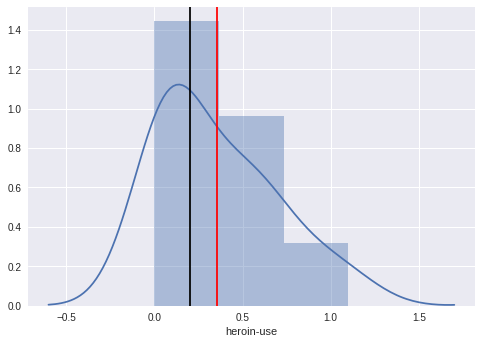

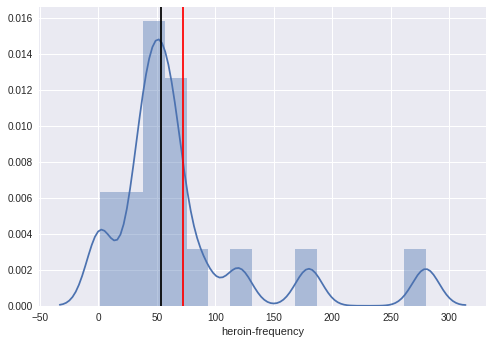

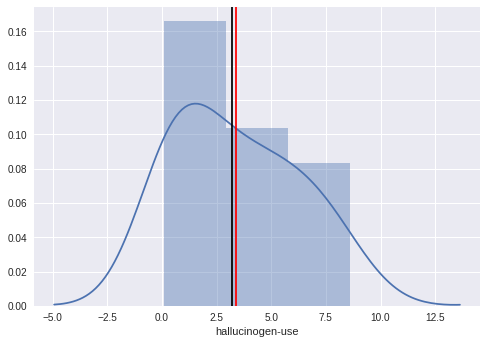

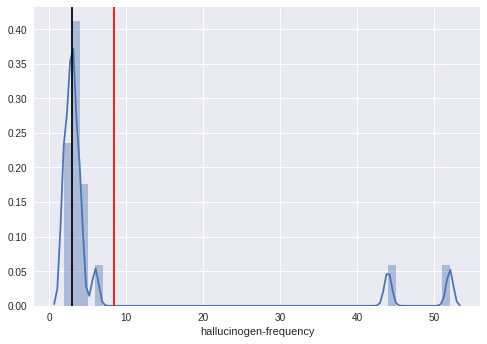

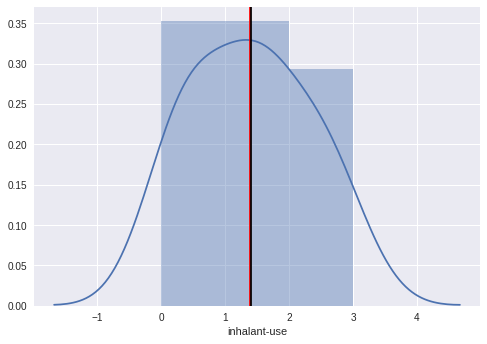

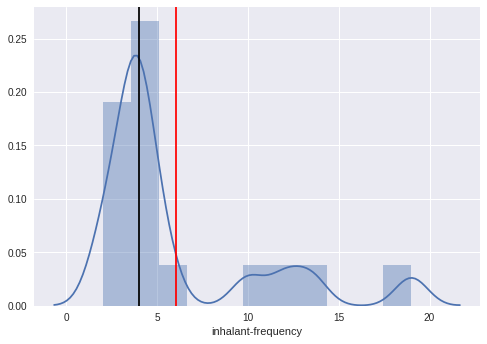

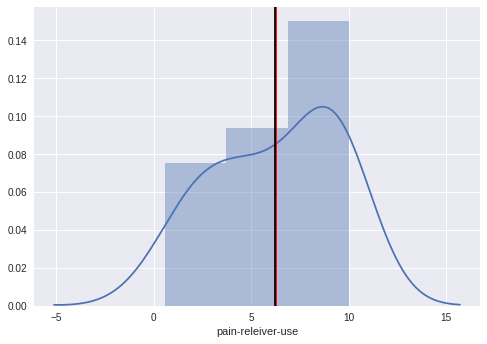

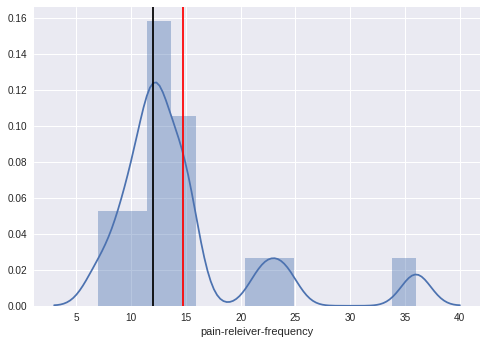

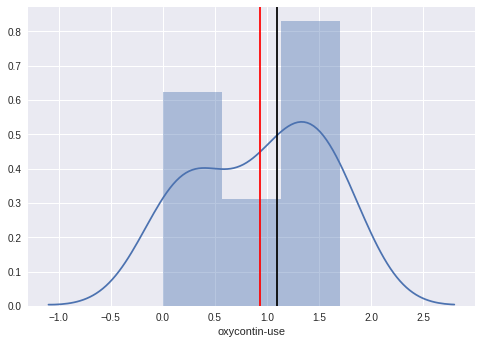

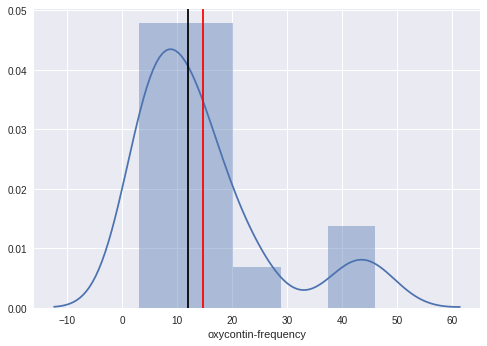

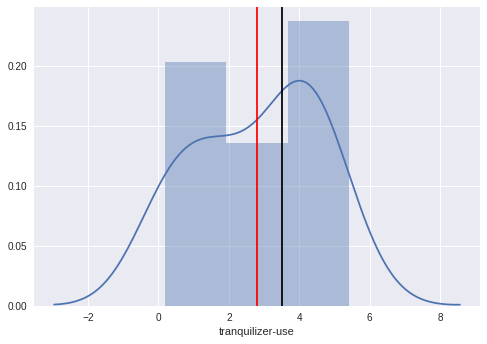

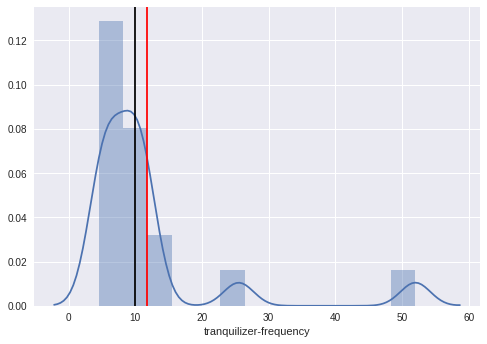

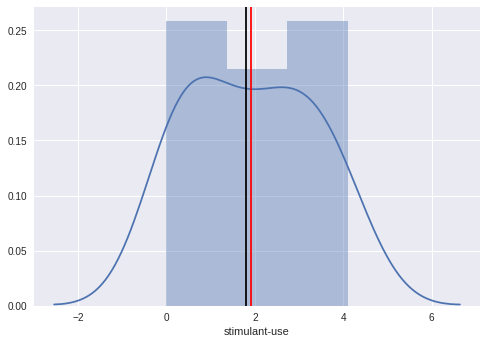

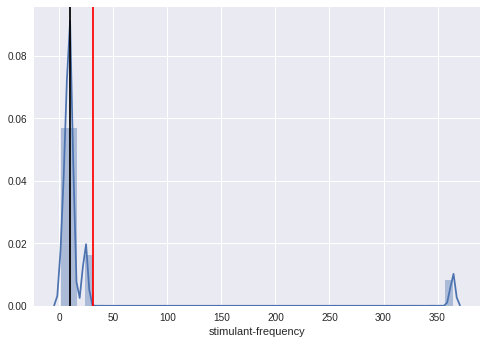

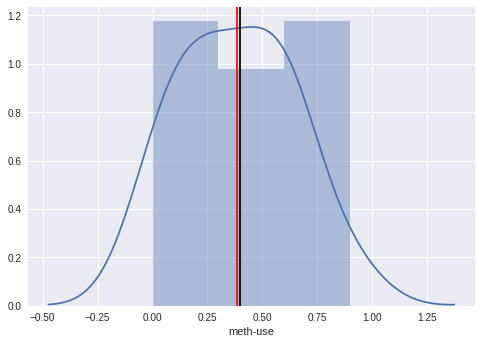

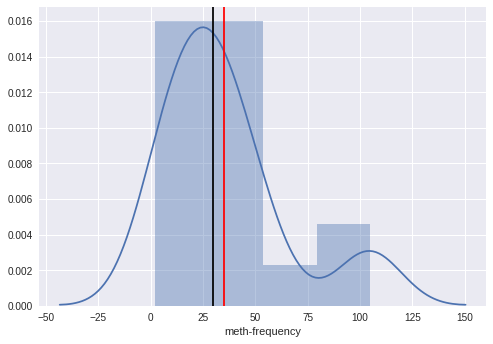

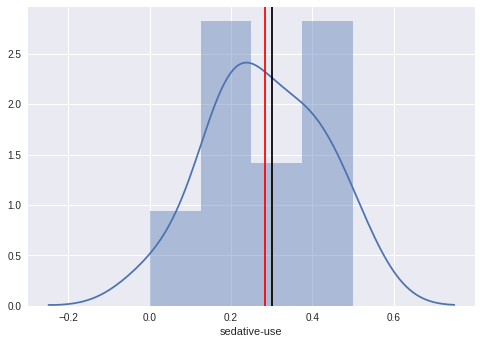

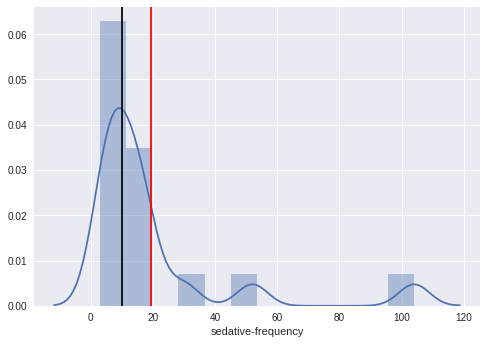

TypeError: unsupported operand type(s) for /: 'str' and 'int'

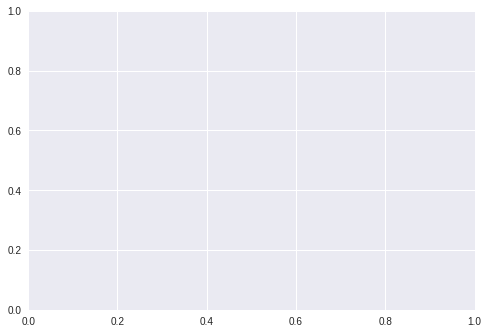

In [145]:
fig = plt.figure(figsize=(20, 20))

for i in range(len(clean_drugs_df.columns)):
    fig.add_subplot(4,7,(1+i))
    sns.distplot(clean_drugs_df[clean_drugs_df.columns[i]])
    plt.axvline(clean_drugs_df[clean_drugs_df.columns[i]].mean(), c='red')
    plt.axvline(clean_drugs_df[clean_drugs_df.columns[i]].median(), c='black')
    plt.show()

In [146]:
clean_drugs_corr = clean_drugs_df.corr()
clean_drugs_corr

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.372510,0.281797,0.563298,0.007798,...,-0.166039,-0.015325,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.488216,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.257550,0.877378,0.250567,0.677614,...,0.589219,-0.048727,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.270734,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.362247,0.785050,0.326653,0.546194,...,0.251554,0.104202,0.448543,-0.415026,0.291766,0.260304,0.425153,0.236677,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.221211,0.620670,-0.261972,0.711613,...,0.971733,-0.277558,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.049041,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.256269,0.892077,0.182973,0.631789,...,0.609618,0.045978,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.292762,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.130228,0.835727,-0.182341,0.899944,...,0.865626,-0.054444,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.067777,0.461914,-0.159997
cocaine-frequency,0.372510,0.257550,0.362247,-0.221211,0.256269,-0.130228,1.000000,0.262978,0.878533,-0.175613,...,-0.221165,-0.231143,-0.145482,-0.130489,-0.293608,-0.025838,-0.144186,0.179294,-0.064307,0.774142
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.262978,1.000000,0.239906,0.750790,...,0.603003,0.070801,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.278807,0.438421,0.091676
crack-frequency,0.563298,0.250567,0.326653,-0.261972,0.182973,-0.182341,0.878533,0.239906,1.000000,-0.303354,...,-0.307205,-0.177900,-0.202805,-0.157391,-0.328555,-0.034634,-0.190149,0.275330,0.040988,0.614635
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.175613,0.750790,-0.303354,1.000000,...,0.775321,0.053076,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.050529,0.333649,-0.023708


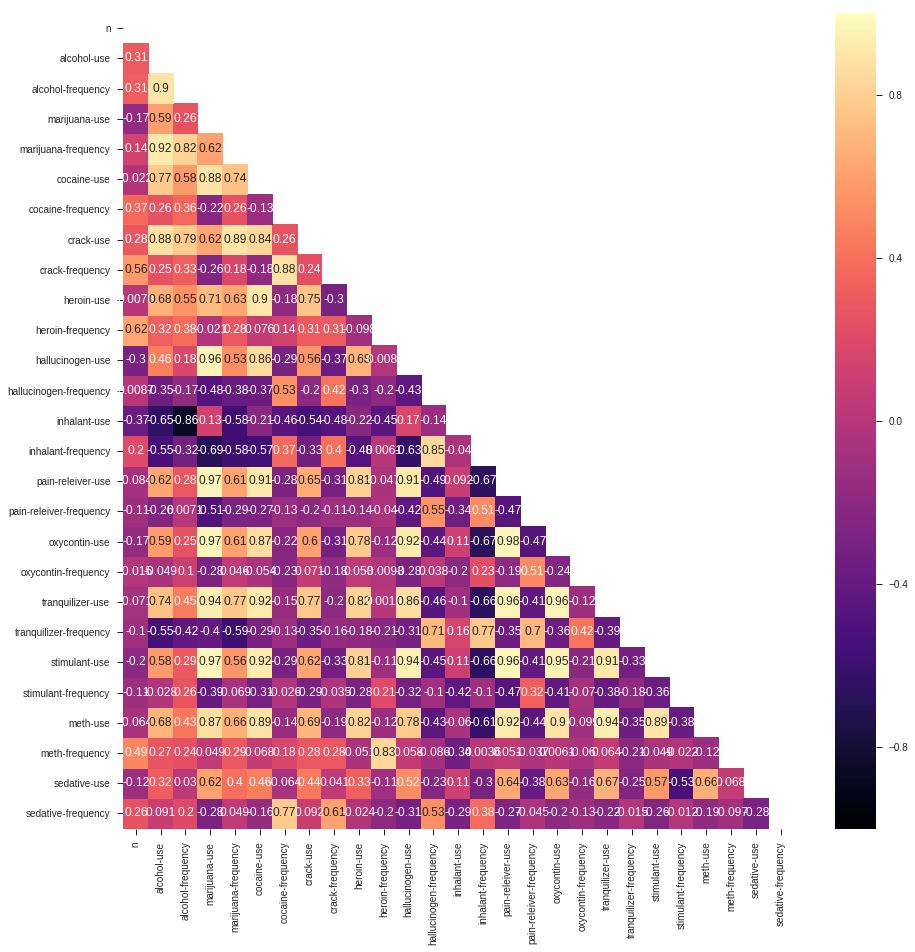

In [154]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(15, 15)
mask = np.zeros_like(clean_drugs_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=clean_drugs_corr, mask=mask, annot=True, ax=ax, cmap='magma')    
plt.show()

## 4. Taking a Closer Look at the Data

**NOTE**
- Below, I opted to separate the frequency from the uses in the original data frame to compare 'apples-to-apples' a little better because frequency indicates the median number of times a particular drug was used in the last 12 months based on the sample size n for a particular age/age-group. Use indicates the percentage of individuals that use a particular drug based on the sample size n for a given age/age-group. 

In [148]:
age_dummies = pd.get_dummies(clean_drugs_df, columns=['age'])
age_dummies

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,age_19,age_20,age_21,age_22-23,age_24-25,age_26-29,age_30-34,age_35-49,age_50-64,age_65+
0,2798,3.9,3.0,1.1,4.0,0.1,5.00,0.0,7.75,0.1,...,0,0,0,0,0,0,0,0,0,0
1,2757,8.5,6.0,3.4,15.0,0.1,1.00,0.0,3.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2792,18.1,5.0,8.7,24.0,0.1,5.50,0.0,7.75,0.1,...,0,0,0,0,0,0,0,0,0,0
3,2956,29.2,6.0,14.5,25.0,0.5,4.00,0.1,9.50,0.2,...,0,0,0,0,0,0,0,0,0,0
4,3058,40.1,10.0,22.5,30.0,1.0,7.00,0.0,1.00,0.1,...,0,0,0,0,0,0,0,0,0,0
5,3038,49.3,13.0,28.0,36.0,2.0,5.00,0.1,21.00,0.1,...,0,0,0,0,0,0,0,0,0,0
6,2469,58.7,24.0,33.7,52.0,3.2,5.00,0.4,10.00,0.4,...,0,0,0,0,0,0,0,0,0,0
7,2223,64.6,36.0,33.4,60.0,4.1,5.50,0.5,2.00,0.5,...,1,0,0,0,0,0,0,0,0,0
8,2271,69.7,48.0,34.0,60.0,4.9,8.00,0.6,5.00,0.9,...,0,1,0,0,0,0,0,0,0,0
9,2354,83.2,52.0,33.0,52.0,4.8,5.00,0.5,17.00,0.6,...,0,0,1,0,0,0,0,0,0,0


In [149]:
age_dummies.columns

Index(['n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_12', 'age_13', 'age_14',
       'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
       'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49',
       'age_50-64', 'age_65+'],
      dtype='object')

In [150]:
frequency_cols = ['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
                  'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49','age_50-64', 'age_65+', 
                  'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'hallucinogen-frequency', 
                  'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency',  'tranquilizer-frequency', 
                  'stimulant-frequency', 'meth-frequency', 'sedative-frequency', 'heroin-frequency']

use_cols = ['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
            'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49', 'age_50-64', 'age_65+', 'alcohol-use', 
            'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
            'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 
            'sedative-use']

In [151]:
frequency_df = age_dummies[frequency_cols]
frequency_df.head()

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
0,1,0,0,0,0,0,0,0,0,0,...,5.0,52.0,19.0,36.0,24.5,52.0,2.0,30.0,13.0,35.50
1,0,1,0,0,0,0,0,0,0,0,...,1.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0,53.75
2,0,0,1,0,0,0,0,0,0,0,...,5.5,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5,2.00
3,0,0,0,1,0,0,0,0,0,0,...,4.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0,1.00
4,0,0,0,0,1,0,0,0,0,0,...,7.0,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0,66.50


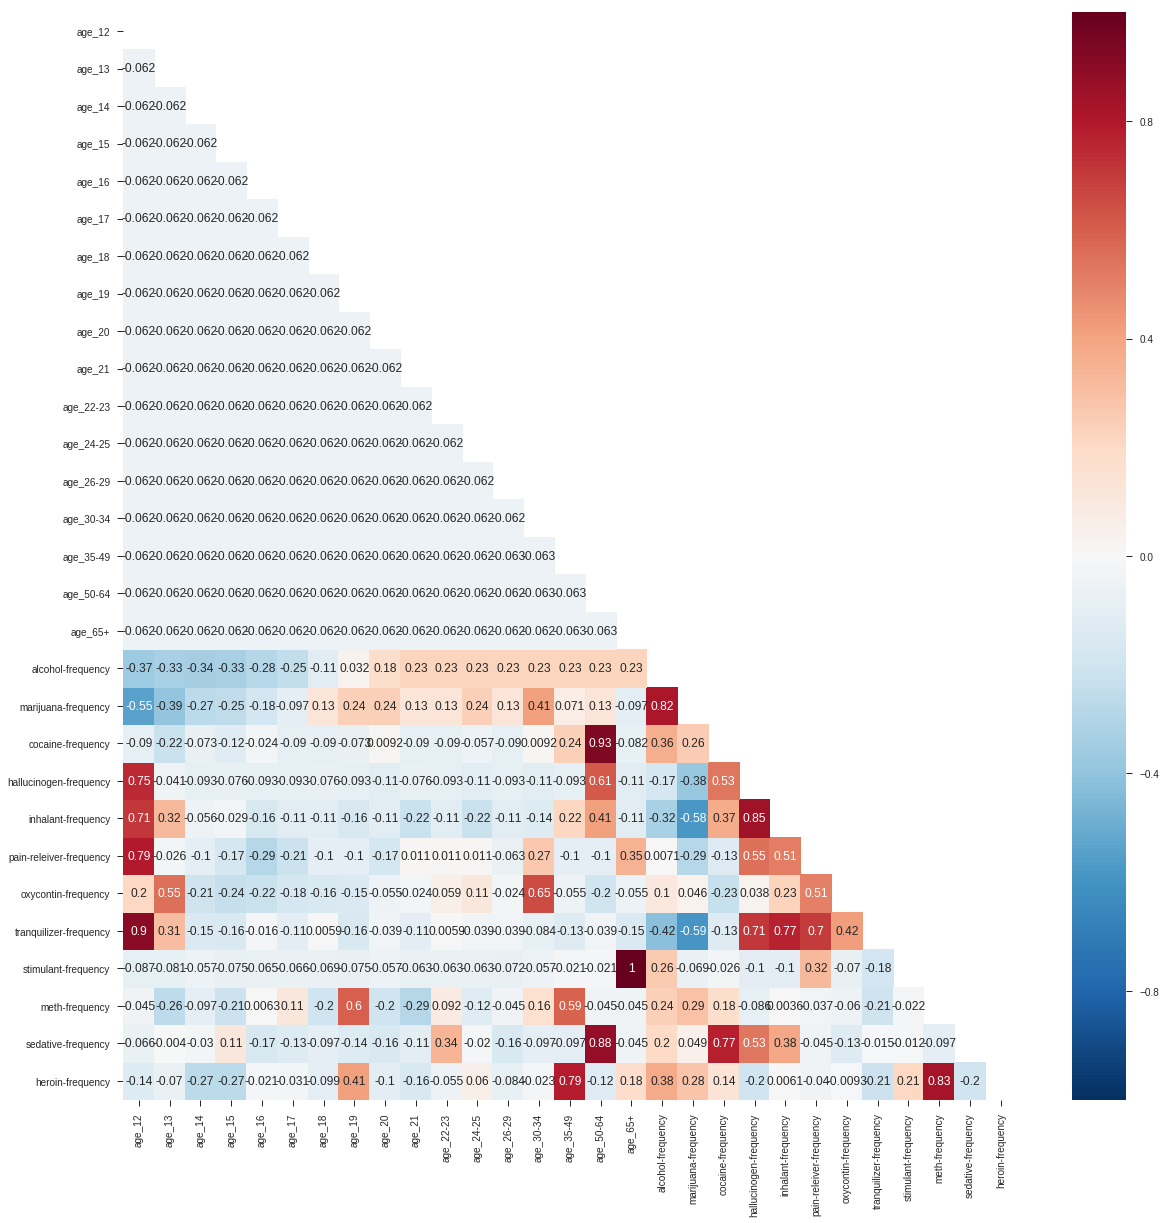

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
age_12,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.089776,0.748817,0.705890,0.791246,0.204586,0.903421,-0.087364,-0.045260,-0.066229,-0.138762
age_13,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.221772,-0.041432,0.324934,-0.026229,0.547192,0.308839,-0.081369,-0.260184,-0.003968,-0.069632
age_14,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.073277,-0.092970,-0.056023,-0.100545,-0.210693,-0.151120,-0.057391,-0.096842,-0.029910,-0.265659
age_15,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.122775,-0.075791,-0.028812,-0.174861,-0.241839,-0.162339,-0.075375,-0.212901,0.110178,-0.269447
age_16,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.023779,-0.092970,-0.164868,-0.286335,-0.221075,-0.016498,-0.064884,0.006321,-0.169997,-0.021335
age_17,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.089776,-0.092970,-0.110445,-0.212019,-0.179547,-0.106246,-0.066383,0.109485,-0.133678,-0.030805
age_18,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,...,-0.089776,-0.075791,-0.110445,-0.100545,-0.158783,0.005939,-0.069380,-0.200006,-0.097359,-0.098989
age_19,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,...,-0.073277,-0.092970,-0.164868,-0.100545,-0.148401,-0.162339,-0.075375,0.599511,-0.138867,0.408599
age_20,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,...,0.009220,-0.110150,-0.110445,-0.174861,-0.054963,-0.038935,-0.057391,-0.200006,-0.159621,-0.102776
age_21,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,...,-0.089776,-0.075791,-0.219290,0.010929,-0.023817,-0.106246,-0.063385,-0.285975,-0.107736,-0.159596


In [156]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20,20)
mask = np.zeros_like(frequency_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=frequency_df.corr(), mask=mask, annot=True, ax=ax)    
plt.show()

frequency_df.corr()

### ** Some relationships worth exploring **
- Alcohol vs. marijuana frequency
- Cocaine vs. sedative frequency. I wouldn't have guessed that an upper and a downer would both be positively correlated. 
- Hallucinogen vs. inhalant frequency. Many inhalants have hallucinogenic affects, for example glue and other solvents, which is more accessible for youth. This may come in handy to address the prompt, which is to recommend some policy changes. Given more data on the information gathering process, one might be able to figure out which inhalants were in question. 
- Inhalant vs. tranquilizer frequency
- Heroin vs. meth frequency

**Age vs. drug frequency correlations**
- Age 12 vs. [tranquilizer, pain reliever, inhalant, and hallucinogen]
- Age 19 vs. meth frequency
- Age 50-64 vs. [sedative and cocaine]
- Age 65+ vs. sedative frequency


**Other Notes**
- Oxycontin vs. Pain Reliever frequency 
- Pain Reliever vs. tranquilizer frequency (tranquilizers are often given for pain relief, however sometimes taking prescription pain relievers w/ tranquilizers can lead to heart problems)
- Stimulant vs. cocaine frequency (cocaine is a type of stimulant).


### 4A. Examine the Drug Frequency only (excluding the Drug Use and Age data)

In [157]:
df_frequency_only = frequency_df.drop(['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', \
                                       'age_19', 'age_20', 'age_21', 'age_22-23', 'age_24-25', 'age_26-29', \
                                       'age_30-34', 'age_35-49','age_50-64', 'age_65+'], axis=1)

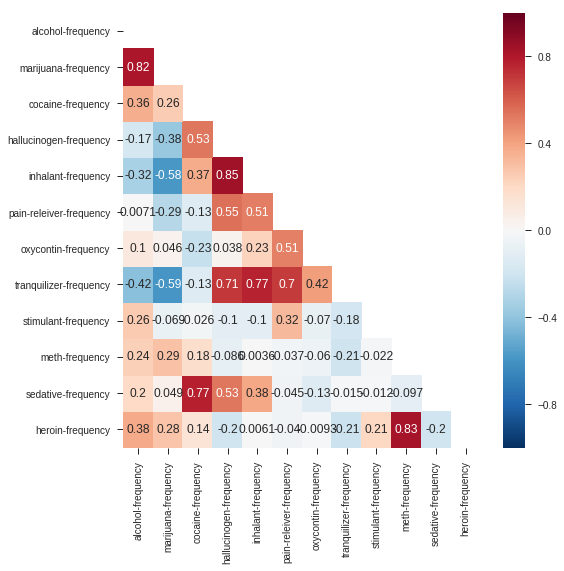

,alcohol-frequency,marijuana-frequency,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
alcohol-frequency,1.000000,0.818769,0.362247,-0.174622,-0.320515,0.007087,0.104202,-0.415026,0.260304,0.236677,0.201423,0.382545
marijuana-frequency,0.818769,1.000000,0.256269,-0.380430,-0.580785,-0.285292,0.045978,-0.591449,-0.069454,0.292762,0.048777,0.281662
cocaine-frequency,0.362247,0.256269,1.000000,0.533794,0.374623,-0.128268,-0.231143,-0.130489,-0.025838,0.179294,0.774142,0.140455
hallucinogen-frequency,-0.174622,-0.380430,0.533794,1.000000,0.848084,0.547363,0.038431,0.705734,-0.103980,-0.086439,0.533095,-0.201896
inhalant-frequency,-0.320515,-0.580785,0.374623,0.848084,1.000000,0.509405,0.230979,0.768138,-0.104564,0.003575,0.383120,0.006099
pain-releiver-frequency,0.007087,-0.285292,-0.128268,0.547363,0.509405,1.000000,0.507395,0.699282,0.324717,-0.037334,-0.045213,-0.039555
oxycontin-frequency,0.104202,0.045978,-0.231143,0.038431,0.230979,0.507395,1.000000,0.415090,-0.070357,-0.059627,-0.128763,-0.009343
tranquilizer-frequency,-0.415026,-0.591449,-0.130489,0.705734,0.768138,0.699282,0.415090,1.000000,-0.180415,-0.205155,-0.014524,-0.213559
stimulant-frequency,0.260304,-0.069454,-0.025838,-0.103980,-0.104564,0.324717,-0.070357,-0.180415,1.000000,-0.022158,-0.011796,0.209432
meth-frequency,0.236677,0.292762,0.179294,-0.086439,0.003575,-0.037334,-0.059627,-0.205155,-0.022158,1.000000,-0.097246,0.832864


In [163]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(8,8)
mask = np.zeros_like(df_frequency_only.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df_frequency_only.corr(), mask=mask, annot=True, ax=ax)    
plt.show()

df_frequency_only.corr()

### Visualize the Relationship between Alcohol and Marijuana Frequency

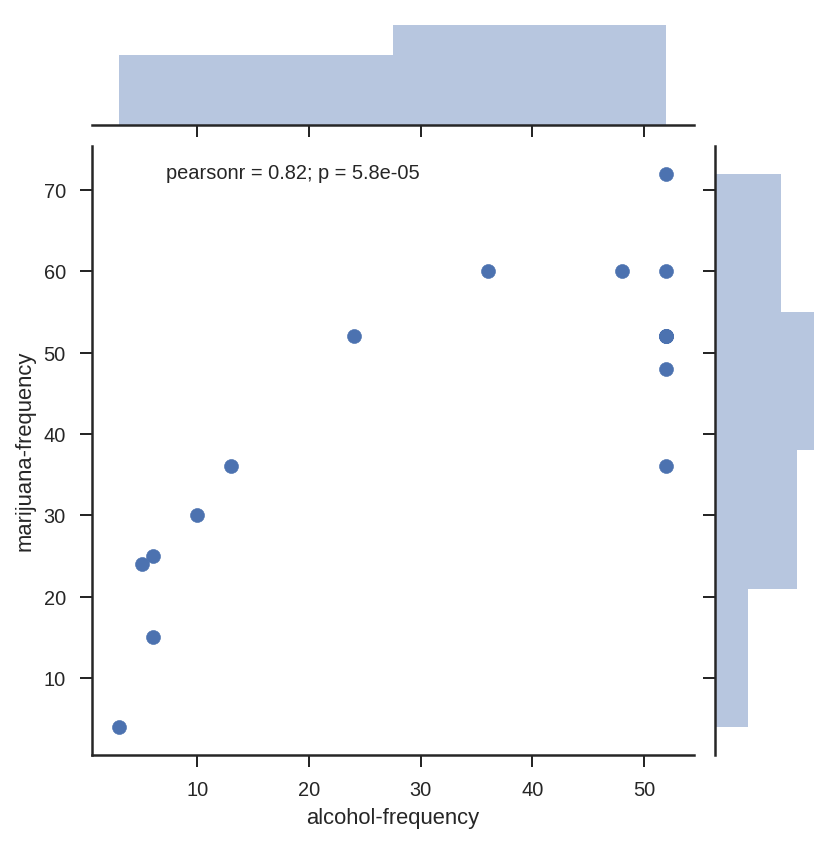

In [68]:
sns.jointplot(x='alcohol-frequency', y='marijuana-frequency', data=frequency_df, kind='scatter')
plt.show()

### Visualize the Relationship between Cocaine and Sedative Frequency

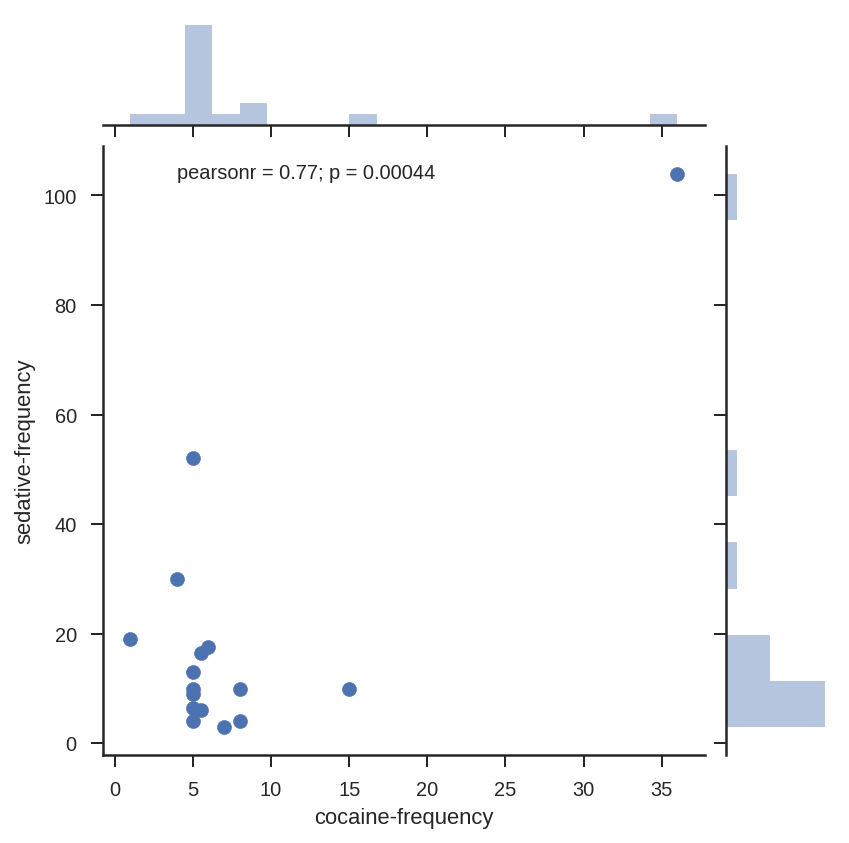

In [74]:
sns.jointplot(x='cocaine-frequency', y='sedative-frequency', data=frequency_df, kind='scatter')
plt.show()

### Visualize the Relationship between Inhalant and Hallucinogen Frequency

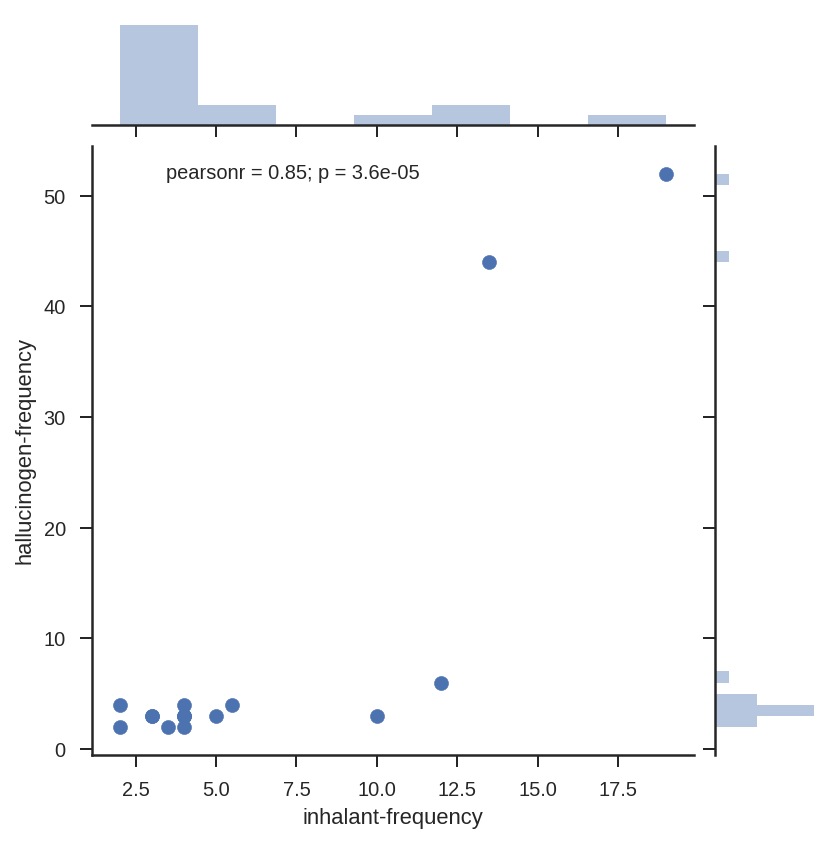

In [79]:
sns.jointplot(x='inhalant-frequency', y='hallucinogen-frequency', data=frequency_df, kind='scatter')
plt.show()

### Visualize the Relationship between Inhalant and Tranquilizer Frequency

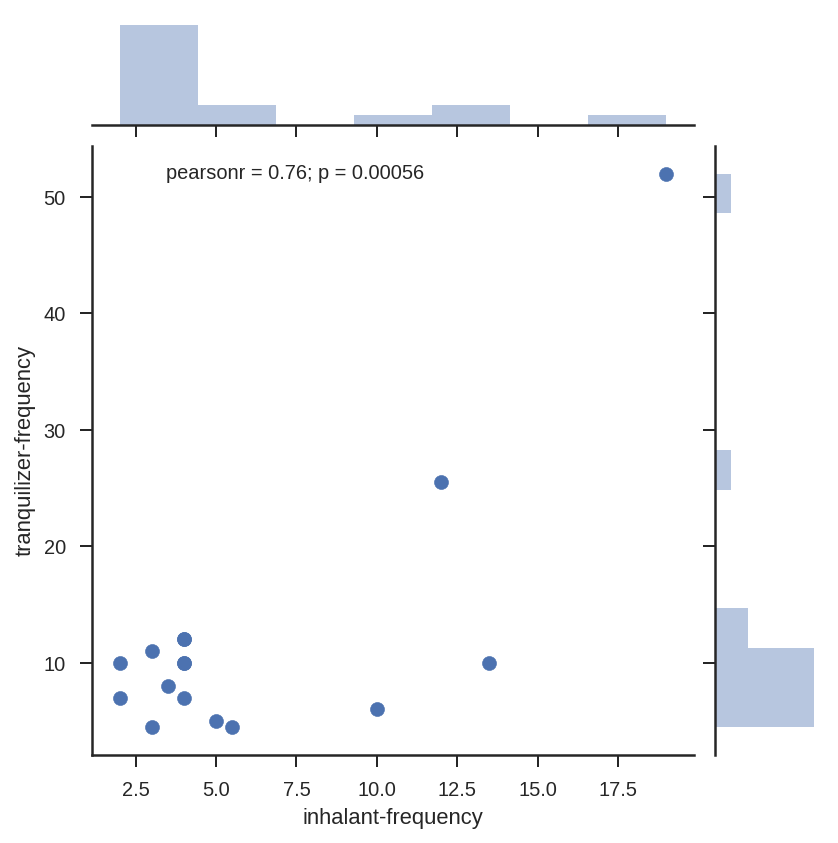

In [80]:
sns.jointplot(x='inhalant-frequency', y='tranquilizer-frequency', data=frequency_df, kind='scatter')
plt.show()

### 4B. Look at the Drug Use data in isolation (without Drug Frequency or Age)

In [164]:
use_df = age_dummies[use_cols]
use_df.head()

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,0,0,0,1,0,0,0,0,0,0,...,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


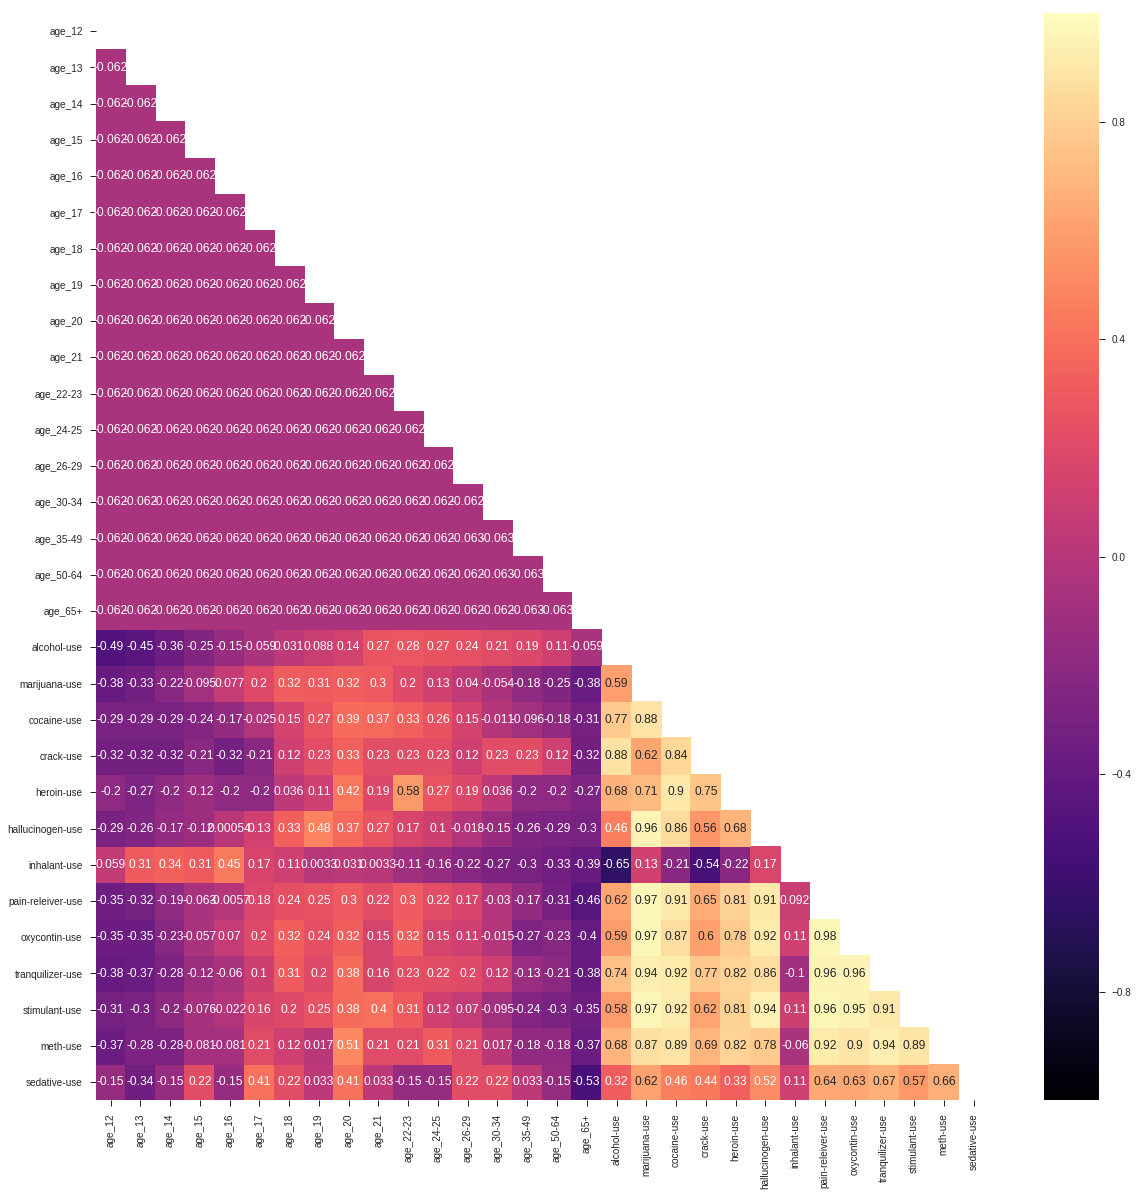

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age_12,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,-0.294755,0.058850,-0.347560,-0.353905,-0.382986,-0.314439,-0.374978,-0.153781
age_13,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.272502,-0.257843,0.308962,-0.315006,-0.353905,-0.368289,-0.296133,-0.276907,-0.340515
age_14,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,-0.165562,0.336752,-0.192929,-0.226798,-0.280108,-0.204601,-0.276907,-0.153781
age_15,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.212167,-0.118084,-0.119422,0.308962,-0.062714,-0.057323,-0.118441,-0.076456,-0.080764,0.219687
age_16,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,0.000543,0.447913,-0.005745,0.069784,-0.059653,-0.021537,-0.080764,-0.153781
age_17,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.212167,-0.195293,0.129736,0.170011,0.181440,0.196891,0.102014,0.161527,0.213449,0.406422
age_18,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,...,0.115728,0.036334,0.332753,0.114430,0.238409,0.323997,0.307772,0.198140,0.115378,0.219687
age_19,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,...,0.225026,0.113543,0.480402,0.003269,0.254686,0.239259,0.204893,0.253059,0.017307,0.032953
age_20,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,...,0.334324,0.422378,0.369665,0.031060,0.303516,0.323997,0.381257,0.381204,0.507662,0.406422
age_21,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,...,0.225026,0.190752,0.268157,0.003269,0.222132,0.154522,0.160802,0.399510,0.213449,0.032953


In [165]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20,20)

mask = np.zeros_like(use_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=use_df.corr(), annot=True, ax=ax, cmap='magma', mask=mask)    
plt.show()

df_use_corr = use_df.corr()
df_use_corr

### ** Some relationships worth exploring **
- Heroin vs. Cocaine use
- Inhalant vs. Alcohol use (negatively correlated)
- Marijuana vs. Stimulant use (notably, marijuana is positively correlated with many other drugs)
- Meth vs. Tranquilizer use

- There's increased drug use in the teen years through 30s compared to other age ranges. However whem compared to the frequency, the frequency of drug use is higher in the early teens and age range of 35+. Notably, the median values in the frequncy data could be thrown off by outliers from the sample. Inhalants seem to be the exception where there is a higher percentage of teens (ages 12-18) using inhalants than any other drug type. 



### Visualize the Relationship between Heroin and Cocaine Use

[]

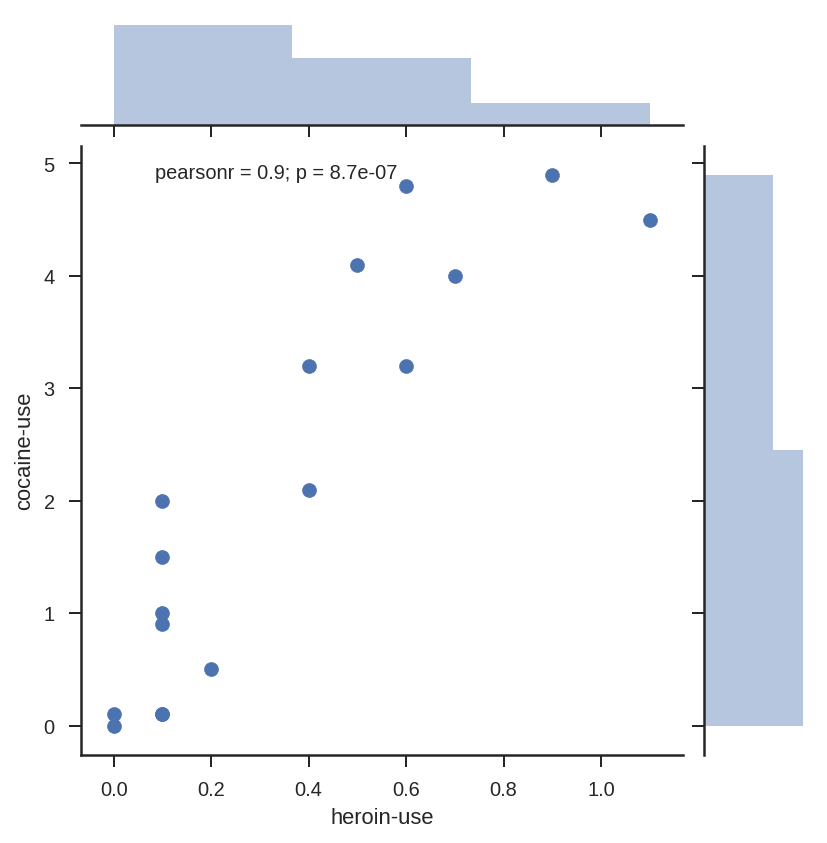

In [83]:
sns.jointplot(x='heroin-use', y='cocaine-use', data = use_df, kind='scatter')
plt.plot()

There is an extremely steep slope (approximately m = 4.5) here. 
Box plot to measure the percentage differences below

### Visualize the Relationship between Alcohol and Inhalant Use

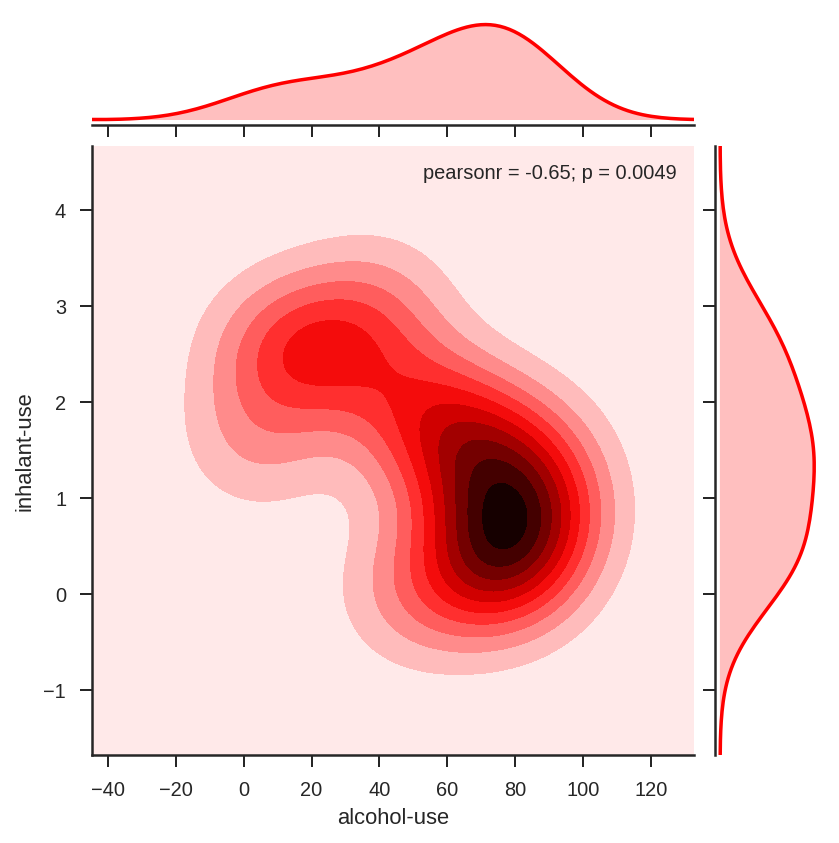

In [84]:
sns.jointplot(x='alcohol-use', y='inhalant-use', data=use_df, kind='kde', color='r')
plt.show()

**NOTES** 
The negative correlation is evident as seen by the decrease in inhalant-use as alcohol-use increases.
Notably, both of the axes are values expressed as percentages.


## 5. Create a testable hypothesis about this data

1. Write a specific question to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables" after testing/examining my hypothesis.
3. Use EDA techniques, numeric and/or visual, to look into the question.
4. Write a report on what is found regarding the hypothesis about the data.



**QUESTION**
- Are Meth and Heroine frequency or use tightly correlated?

**DELIVERABLES**
- Display a correlation matrix
- Calculate a t-statistic
- Derive a p-value
- Determine whether to accept or reject the null hypothesis
- Make any recommendations should any emerge to the mayor when he/she returns from the Bahamas.

**HYPOTHESES**
- Null Hypothesis: no difference in the average frequency for Meth and average frequency for Heroin
- Alternate Hypothesis: there is a difference


In [166]:
nanmean_meth = np.nanmean(df_frequency_only['meth-frequency'])

In [167]:
clean_meth = df_frequency_only['meth-frequency'].mask(df_frequency_only['meth-frequency'].isnull(), nanmean_meth)
clean_meth

0      30.0
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16     30.0
Name: meth-frequency, dtype: float64

In [168]:
nanmean_heroin = np.nanmean(df_frequency_only['heroin-frequency'])
nanmean_heroin

72.132352941176464

In [169]:
clean_heroin = df_frequency_only['heroin-frequency'].mask(df_frequency_only['heroin-frequency'].isnull(), \
                                                          nanmean_heroin)
clean_heroin

0      35.50
1      53.75
2       2.00
3       1.00
4      66.50
5      64.00
6      46.00
7     180.00
8      45.00
9      30.00
10     57.50
11     88.00
12     50.00
13     66.00
14    280.00
15     41.00
16    120.00
Name: heroin-frequency, dtype: float64

In [170]:
meth = df_frequency_only['meth-frequency']
heroin = df_frequency_only['heroin-frequency' ]

In [171]:
np.mean(clean_meth)

35.264705882352942

In [172]:
np.mean(clean_heroin)

72.132352941176464

In [173]:
mean_diff = np.mean(clean_meth)-np.mean(clean_heroin)
mean_diff

-36.867647058823522

In [174]:
array_meth = np.array(clean_meth)
array_heroin = np.array(clean_heroin)

In [175]:
stats.ttest_ind(clean_meth, clean_heroin)

Ttest_indResult(statistic=-2.0447649225340214, pvalue=0.049176616660573699)

#### **RESPONSE**

Because p=0.046, which is < 0.05, it is considered statistically significant, therefore it suggests that we should reject the null hypothesis that there is no difference in average heroin and average meth use. While meth and heroin frequency are positively correlated (pearson correlation score of 0.87), the average frequency is not the same. Another observation is that meth and heroin usage increase at age 19 (index 7) and age-range 35-49 (index 14). Given more data, this might be something worth further exploring. 

My recommendaiton to the major would be to explore these two age groups more closely and collect more data. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.